In [1]:
import math
import json
import folium
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import utils

from scipy import stats
from scipy.stats import skew
from scipy.stats import normaltest
from missingno import matrix as missing
from summarytools import dfSummary as summary

# Read the CSV file into a DataFrame
property_sales_data = pd.read_csv('real_estate_dataset.csv', low_memory=False)

# Display the first 5 rows of the DataFrame
property_sales_data.head()

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['figure.dpi'] = 144

sns.set()

In [2]:
# 1. Load the data
property_sales_data = pd.read_csv('real_estate_dataset.csv', low_memory=False)

# 2. First look at the data
print("Dataset shape:", property_sales_data.shape)
print("\nFirst 5 rows:")
display(property_sales_data.head())

Dataset shape: (20008, 20)

First 5 rows:


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98461,Manufacturing,30131000,9434-9446 N 107TH ST,NaN,9.0,6300.0,Service Building,Concrete Block,1.0,1978.0,NaN,20600.0,6,NaN,0,0,0.0,4/1/2022,950000.0
1,98464,Commercial,30152000,9306-9316 N 107TH ST,NaN,9.0,6202.0,Office Building - 1 Story,Brick,1.0,1982.0,NaN,9688.0,23,NaN,0,0,35719.0,10/7/2022,385000.0
2,98508,Residential,49980110,9327 N SWAN RD,NaN,9.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,1341648.0,1/7/2022,800000.0
3,98519,Residential,49993200,9411 W COUNTY LINE RD,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1959.0,6.0,1334.0,1,3.0,1,1,83200.0,8/9/2022,280000.0
4,98561,Residential,50042000,9322 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,10.0,1006.0,1,6.0,1,0,8303.0,5/23/2022,233100.0


In [3]:
summary(property_sales_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PropertyID[int64],Mean (sd) : 619344.5 (329743.8)min < med < max:98461.0 < 855489.0 < 881476.0IQR (CV) : 657061.0 (1.9),"19,883 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAOwAAABcCAYAAABtGVlhAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAddJREFUeJzt3MFt6kAUQFEcZUkbkSjAdOE0kNroIu4iLoQu/EUFHyRb5JJzFrAZjWbB9QCLN6zregAa3p59AOB+goWQ92cfACqGYfjca+91Xb/vWSdYeMA4jufDxpZl+bl3rWDhQdM03R3Y/8zz/NADwG9YCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyECBZCBAshgoUQwUKIYCFEsBAiWAgRLIQIFkIECyGChRDBQohgIUSwECJYCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyECBZCBAshgoUQwUKIYCFEsBAiWAgRLIQIFkIECyGChRDBQohgIUSwECJYCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyECBZCBAshgoWQ93sXDsPwudch1nX93mtv+JPB3ozjeN76AMuy/Gy9J7yqh4K9maZps8Aul8vX7X0YhsMe3Nwc/nqwWzudTh/H43Hzfd3cvKKnB7v1rX0zz/PmX93hN/AvMYQIFkIECyGChRDBQohgIUSwECJYCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyE/IqJE1u7Xq8fe82KMieKZ3rJYPeaFWVOFLlg95iXFJrBdN5rwiMJ59vLMz+v/wB4AjkrwkepTgAAAABJRU5ErkJggg=="">",0(0.0%)
2,PropType[object],1. Residential2. Condominium3. Lg Apartment4. Commercial5. Manufacturing6. Exempt,"16,280 (81.4%)2,592 (13.0%)595 (3.0%)526 (2.6%)10 (0.0%)5 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAN8AAADHCAYAAACZfIbaAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAArtJREFUeJzt3TFOAzEUQEFvlCOFW4TTkluQOxkhaiQKluddZoq02ebJsi35b3POAfy9S/CfgPigIz6IiA8i4oOI+CCyjTFeqz+HPc0538bCrrfb7aX+CPhtz+fzfSzu+vlzv9+X/1D4qcfjcYgFxZ4PIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4oHy38yjvHMKZeC6e05qLPxe/GQsNDXs+iIgPIuKD/3bgsvpmGE45n+8Is9PgdPP53CnCF3s+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyJGhEHEi9UQMSIMIvZ8EBEfRMQHqx64OBiBYESYUV4QjAhz9wf7sueDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4IGJEGES8WA0RI8IgYs8HEfFBRHyw4oGLwxYIRoQZDwbBiDD3frA/ez6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIkaEQcSL1RAxIgwi9nwQER9ExAcR8UFEfBC5bNv27VUDsB8rH0TEBxHxQUR8EBEfRMQHEfFBRHwQER9ExAcR8UFEfBARH0TEBxHxQUR8EBEfRMQHEfFBRHwQER9ExAcR8UFEfBAxIgwiVj6IiA8i4oOI+CAiPogYEQYRKx9ExAcR8UFEfBARH0TEBxHxQUR8EBEfRMQHEfFBRHwQER9ExAcR8UFEfBARH0TEBxHxQUR8EBEfRMQHEfFBRHwQMSIMIlY+iIgPIuKDiPggIj6IiA8i4oOI+GA0PgD7VWBPX9hFLwAAAABJRU5ErkJggg=="">",0(0.0%)
3,taxkey[int64],Mean (sd) : 3509043723.5 (1502019772.9)min < med < max:30131000.0 < 3250347500.0 < 7160379000.0IQR (CV) : 2490489750.0 (2.3),"19,025 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAOwAAABcCAYAAABtGVlhAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAlRJREFUeJzt3cFto0AYhmHPykfaiOQCnC6cBrY2d7F0se5gG3ABvhNxyHlBmtHwjZ/nHCFyeEOAf4ayLMsJyPCr9wkA2wkWgpx7n8C7K6V8tTr2six/Wh2bPgR7ANfr9bP2MR+Px9/ax6Q/wR7E7XarFtg8z9X/AHAM7mEhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiOV1/Reaf75er4/T6WT9Kv8l2M4LzZ/P5xorbCLYjgvNV/f7XbBs5h4WgrjC0pVN6PYRLN3ZhG47wXIINqHbxj0sBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBlyeV2jRdE2S6O7IYNtsSjaZmkcwbDB1l4UbbM0jsA9LAQRLAQRLAQRLAQRLAQRLAQRLAQZ+j3su/oZ8iilNDn+iJ/ASCHYQV0ul49pmqofd9RPYKQQ7MAafBrzd4MrtxntHQRL1yu3Ge19BMtuZrT78ZQYgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgpwH/Mrcyi4GDOk82lfmVnYxYFTdg22095Bg39hz4F0jDxEs1HYZdNdIwTKsW+X/3OZ5rn77tpenxBBEsBBEsBBEsBDk3HnIwYADtHpKXHvIwYADNH6t4zMN0I/3sHCACaqt01OChc4TVHumpwQLHW8L905Pea0DQQQLQQQLQQQLQQQLQcqyLNt+sJSvFpNO6yPyaZr+Hf24zjXnXJ9Bv/9qfa2zdReLb4tqsCxr39zJAAAAAElFTkSuQmCC"">",0(0.0%)
4,Address[object],"1. 5815 N 37TH ST2. 3371 S 12TH ST3. 777 N PROSPECT AV, Unit MID T4. nan5. 10939 W CAMERON AV6. 1235-1237 S CESAR E CHAVEZ DR7. 3318 W BIRCHWOOD AV8. 3906 N 52ND ST9. 2657 N 55TH ST10. 8727 N 72ND ST11. other","9 (0.0%)8 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)19,963 (99.8%)","<img src = ""data:image/png;

In [4]:
# 3. Check data types and basic info
print("\nData types and non-null counts:")
print(property_sales_data.info())

# 4. Basic statistical summary
print("\nStatistical summary:")
display(property_sales_data.describe().T)


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20008 entries, 0 to 20007
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    20008 non-null  int64  
 1   PropType      20008 non-null  object 
 2   taxkey        20008 non-null  int64  
 3   Address       20004 non-null  object 
 4   CondoProject  2586 non-null   object 
 5   District      20006 non-null  float64
 6   nbhd          19951 non-null  float64
 7   Style         19940 non-null  object 
 8   Extwall       17309 non-null  object 
 9   Stories       19905 non-null  float64
 10  Year_Built    19974 non-null  float64
 11  Rooms         18944 non-null  float64
 12  FinishedSqft  19933 non-null  float64
 13  Units         20008 non-null  int64  
 14  Bdrms         18945 non-null  float64
 15  Fbath         20008 non-null  int64  
 16  Hbath         20008 non-null  int64  
 17  Lotsize       20007 non-null  float6

,count,mean,std,min,25%,50%,75%,max
PropertyID,20008.0,6.193445e+05,3.297438e+05,98461.0,2.110655e+05,8.554890e+05,8.681265e+05,8.814760e+05
taxkey,20008.0,3.509044e+09,1.502020e+09,30131000.0,2.450312e+09,3.250348e+09,4.940802e+09,7.160379e+09
District,20006.0,7.884385e+00,4.272109e+00,1.0,4.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01
nbhd,19951.0,3.339903e+03,1.770248e+03,40.0,1.830000e+03,3.150000e+03,4.620000e+03,2.491000e+04
Stories,19905.0,1.369179e+00,5.402946e-01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.900000e+01
Year_Built,19974.0,1.936518e+03,1.093841e+02,0.0,1.922000e+03,1.949000e+03,1.958000e+03,2.022000e+03
Rooms,18944.0,6.882760e+00,3.244466e+00,0.0,5.000000e+00,6.000000e+00,8.000000e+00,6.300000e+01
FinishedSqft,19933.0,2.162681e+03,7.749029e+03,0.0,1.075000e+03,1.377000e+03,1.964000e+03,3.600000e+05
Units,20008.0,1.867503e+00,1.332310e+01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,7.810000e+02
Bdrms,18945.0,3.486461e+00,1.607178e+00,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.200000e+01


In [5]:
### Missing Values Analysis

In [6]:
# 1. Check for missing values
missing_values = property_sales_data.isnull().sum()
missing_percentages = (missing_values / len(property_sales_data)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage (%)', ascending=False)
print("\nMissing values summary:")
print(missing_data)


Missing values summary:
              Missing Values  Percentage (%)
CondoProject           17422       87.075170
Extwall                 2699       13.489604
Rooms                   1064        5.317873
Bdrms                   1063        5.312875
Stories                  103        0.514794
FinishedSqft              75        0.374850
Style                     68        0.339864
nbhd                      57        0.284886
Year_Built                34        0.169932
Address                    4        0.019992
District                   2        0.009996
Lotsize                    1        0.004998


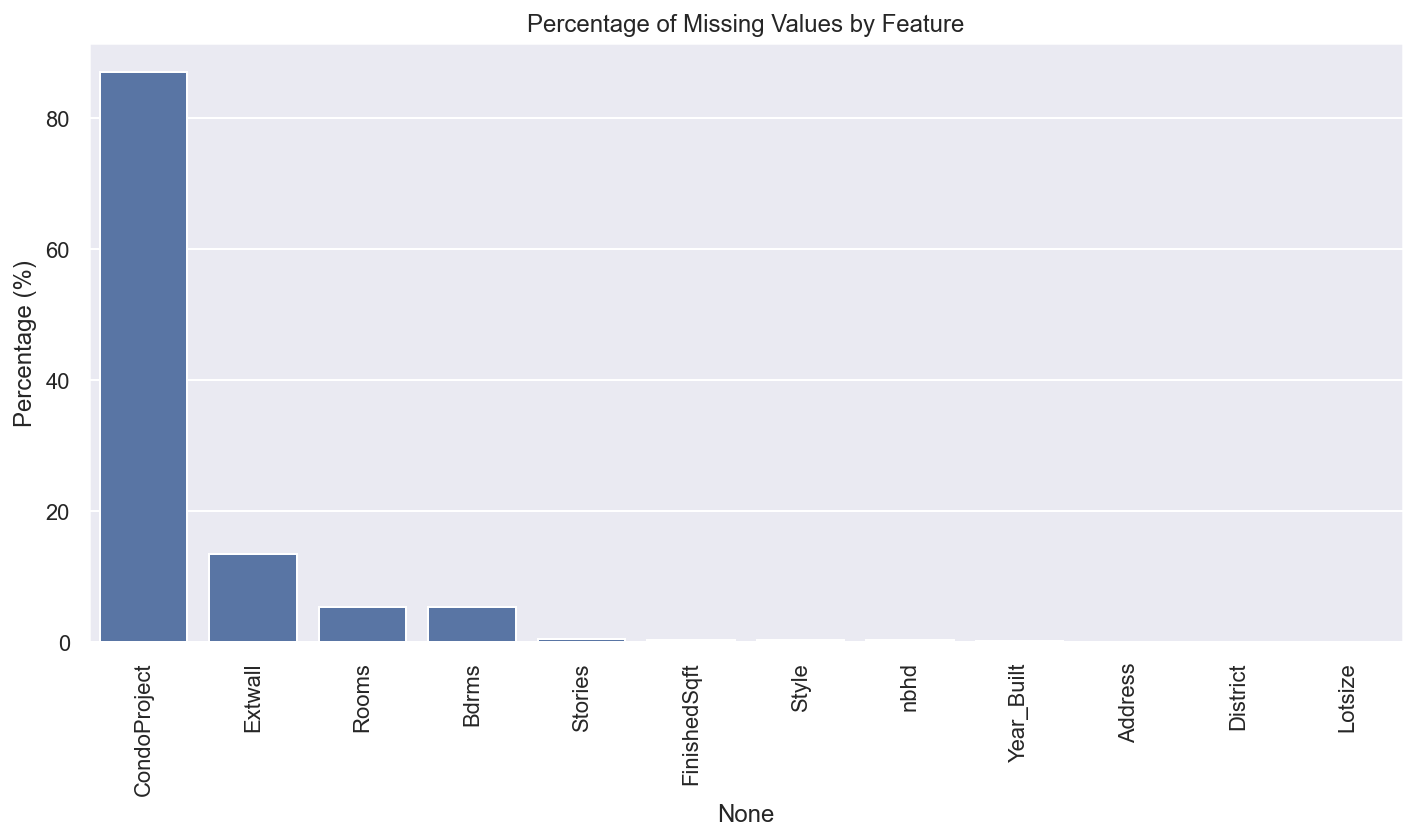

In [7]:
# 2. Visualize missing values
if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y='Percentage (%)', data=missing_data)
    plt.xticks(rotation=90)
    plt.title('Percentage of Missing Values by Feature')
    plt.tight_layout()
    plt.show()

In [8]:
# 3. Identify feature types
numerical_features = [feat for feat in property_sales_data.columns if property_sales_data[feat].dtypes != 'O']
categorical_features = [feature for feature in property_sales_data.columns if property_sales_data[feature].dtype == 'O']

print(f"\nNumber of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")


Number of numerical features: 14
Number of categorical features: 6


In [9]:
# 4. Handle missing values
for column in missing_data.index:
    missing_pct = missing_data.loc[column, 'Percentage (%)']
    
    if missing_pct > 30:
        print(f"Column {column} has {missing_pct:.2f}% missing values. Consider dropping this column.")
    
    elif column in numerical_features:
        median_value = property_sales_data[column].median()
        property_sales_data[column].fillna(median_value, inplace=True)
        print(f"Imputed missing values in {column} with median: {median_value}")
        
    elif column in categorical_features:
        mode_value = property_sales_data[column].mode()[0]
        property_sales_data[column].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in {column} with mode: {mode_value}")

Column CondoProject has 87.08% missing values. Consider dropping this column.
Imputed missing values in Extwall with mode: Aluminum/Vinyl
Imputed missing values in Rooms with median: 6.0
Imputed missing values in Bdrms with median: 3.0
Imputed missing values in Stories with median: 1.0
Imputed missing values in FinishedSqft with median: 1377.0
Imputed missing values in Style with mode: Ranch
Imputed missing values in nbhd with median: 3150.0
Imputed missing values in Year_Built with median: 1949.0
Imputed missing values in Address with mode: 5815 N 37TH ST
Imputed missing values in District with median: 8.0
Imputed missing values in Lotsize with median: 5040.0


In [10]:
# 5. Verify no missing values remain
# assert property_sales_data.isnull().sum().sum() == 0, "There are still missing values in the dataset!"

In [11]:
### Target Variable Analysis

In [12]:
# 1. Basic statistics of the target variable
print("\nSale Price Statistics:")
print(property_sales_data['Sale_price'].describe())


Sale Price Statistics:
count    2.000800e+04
mean     2.415009e+05
std      7.917556e+05
min      2.500000e+03
25%      1.235000e+05
50%      1.779000e+05
75%      2.440000e+05
max      7.042500e+07
Name: Sale_price, dtype: float64


In [13]:
# 2. Visualize the distribution
plt.figure(figsize=(15, 15))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

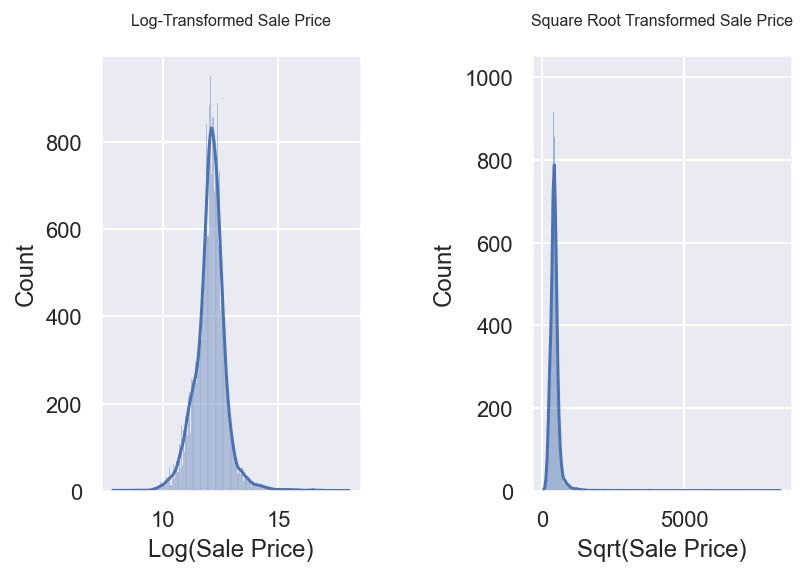

In [14]:
# # Original distribution
# plt.subplot(1, 3, 1)
# sns.histplot(property_sales_data['Sale_price'], kde=True)
# plt.title('Original Sale Price Distribution', fontsize=8, pad=15)
# plt.xlabel('Sale Price ($)')

# Log-transformed distribution
plt.subplot(1, 2, 1)
log_sale_price = np.log1p(property_sales_data['Sale_price'])
sns.histplot(log_sale_price, kde=True)
plt.title('Log-Transformed Sale Price', fontsize=8, pad=15)
plt.xlabel('Log(Sale Price)')

# Square root transformed distribution
plt.subplot(1, 2, 2)
sqrt_sale_price = np.sqrt(property_sales_data['Sale_price'])
sns.histplot(sqrt_sale_price, kde=True)
plt.title('Square Root Transformed Sale Price', fontsize=8, pad=15)
plt.xlabel('Sqrt(Sale Price)')

plt.tight_layout(pad=3.0)
plt.show()

In [15]:
# 3. Compare skewness of different transformations
transformations = {
    'Original': property_sales_data['Sale_price'],
    'Log': log_sale_price,
    'Square Root': sqrt_sale_price
}

for name, data in transformations.items():
    print(f"Skewness of {name} Sale Price: {skew(data)}")

Skewness of Original Sale Price: 46.53978796051771
Skewness of Log Sale Price: 0.37378229849426
Skewness of Square Root Sale Price: 9.596334260562944


In [16]:
# 4. Add the transformed target to the dataset
property_sales_data['log_Sale_price'] = log_sale_price

In [17]:
### Numerical Feature Analysis

In [18]:
# 1. Display the head of numerical features
print("\nNumerical features preview:")
display(property_sales_data[numerical_features].head())


Numerical features preview:


,PropertyID,taxkey,District,nbhd,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
0,98461,30131000,9.0,6300.0,1.0,1978.0,6.0,20600.0,6,3.0,0,0,0.0,950000.0
1,98464,30152000,9.0,6202.0,1.0,1982.0,6.0,9688.0,23,3.0,0,0,35719.0,385000.0
2,98508,49980110,9.0,40.0,1.0,1949.0,6.0,1377.0,0,3.0,0,0,1341648.0,800000.0
3,98519,49993200,9.0,40.0,1.0,1959.0,6.0,1334.0,1,3.0,1,1,83200.0,280000.0
4,98561,50042000,9.0,40.0,1.0,1980.0,10.0,1006.0,1,6.0,1,0,8303.0,233100.0


In [19]:
# 2. Statistical summary of numerical features
print("\nNumerical features statistics:")
display(property_sales_data[numerical_features].describe().T)


Numerical features statistics:


,count,mean,std,min,25%,50%,75%,max
PropertyID,20008.0,6.193445e+05,3.297438e+05,98461.0,2.110655e+05,8.554890e+05,8.681265e+05,8.814760e+05
taxkey,20008.0,3.509044e+09,1.502020e+09,30131000.0,2.450312e+09,3.250348e+09,4.940802e+09,7.160379e+09
District,20008.0,7.884396e+00,4.271896e+00,1.0,4.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01
nbhd,20008.0,3.339362e+03,1.767754e+03,40.0,1.830000e+03,3.150000e+03,4.620000e+03,2.491000e+04
Stories,20008.0,1.367278e+00,5.395493e-01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.900000e+01
Year_Built,20008.0,1.936539e+03,1.092924e+02,0.0,1.922000e+03,1.949000e+03,1.958000e+03,2.022000e+03
Rooms,20008.0,6.835816e+00,3.163223e+00,0.0,5.000000e+00,6.000000e+00,8.000000e+00,6.300000e+01
FinishedSqft,20008.0,2.159736e+03,7.734640e+03,0.0,1.077000e+03,1.377000e+03,1.961000e+03,3.600000e+05
Units,20008.0,1.867503e+00,1.332310e+01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,7.810000e+02
Bdrms,20008.0,3.460616e+00,1.567702e+00,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.200000e+01


In [20]:
# 3. Analyze distribution and normality of numerical features
features_list = []
test_statistics = []
p_values = []
skewness_values = []

for feature in property_sales_data[numerical_features].columns:
    # Perform normality test
    test_statistic, p_value = normaltest(property_sales_data[feature])

    # Append results to respective lists
    features_list.append(feature)
    test_statistics.append(test_statistic)
    p_values.append(p_value)

    # Calculate skewness
    skewness = skew(property_sales_data[feature])
    skewness_values.append(skewness)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Feature': features_list,
                           'Test Statistics': test_statistics,
                           'p-value': p_values,
                           'Skew': skewness_values})
print("\nNormality test results:")
display(results_df)


Normality test results:


,Feature,Test Statistics,p-value,Skew
0,PropertyID,102403.178269,0.000000e+00,-0.618182
1,taxkey,1357.024919,2.117303e-295,0.126955
2,District,34694.585034,0.000000e+00,-0.001217
3,nbhd,99.209014,2.864418e-22,0.172993
4,Stories,22622.881241,0.000000e+00,5.249117
5,Year_Built,39677.337815,0.000000e+00,-16.393786
6,Rooms,12025.278734,0.000000e+00,2.431693
7,FinishedSqft,48069.454062,0.000000e+00,24.935486
8,Units,61402.530277,0.000000e+00,46.884299
9,Bdrms,12928.429920,0.000000e+00,2.629097


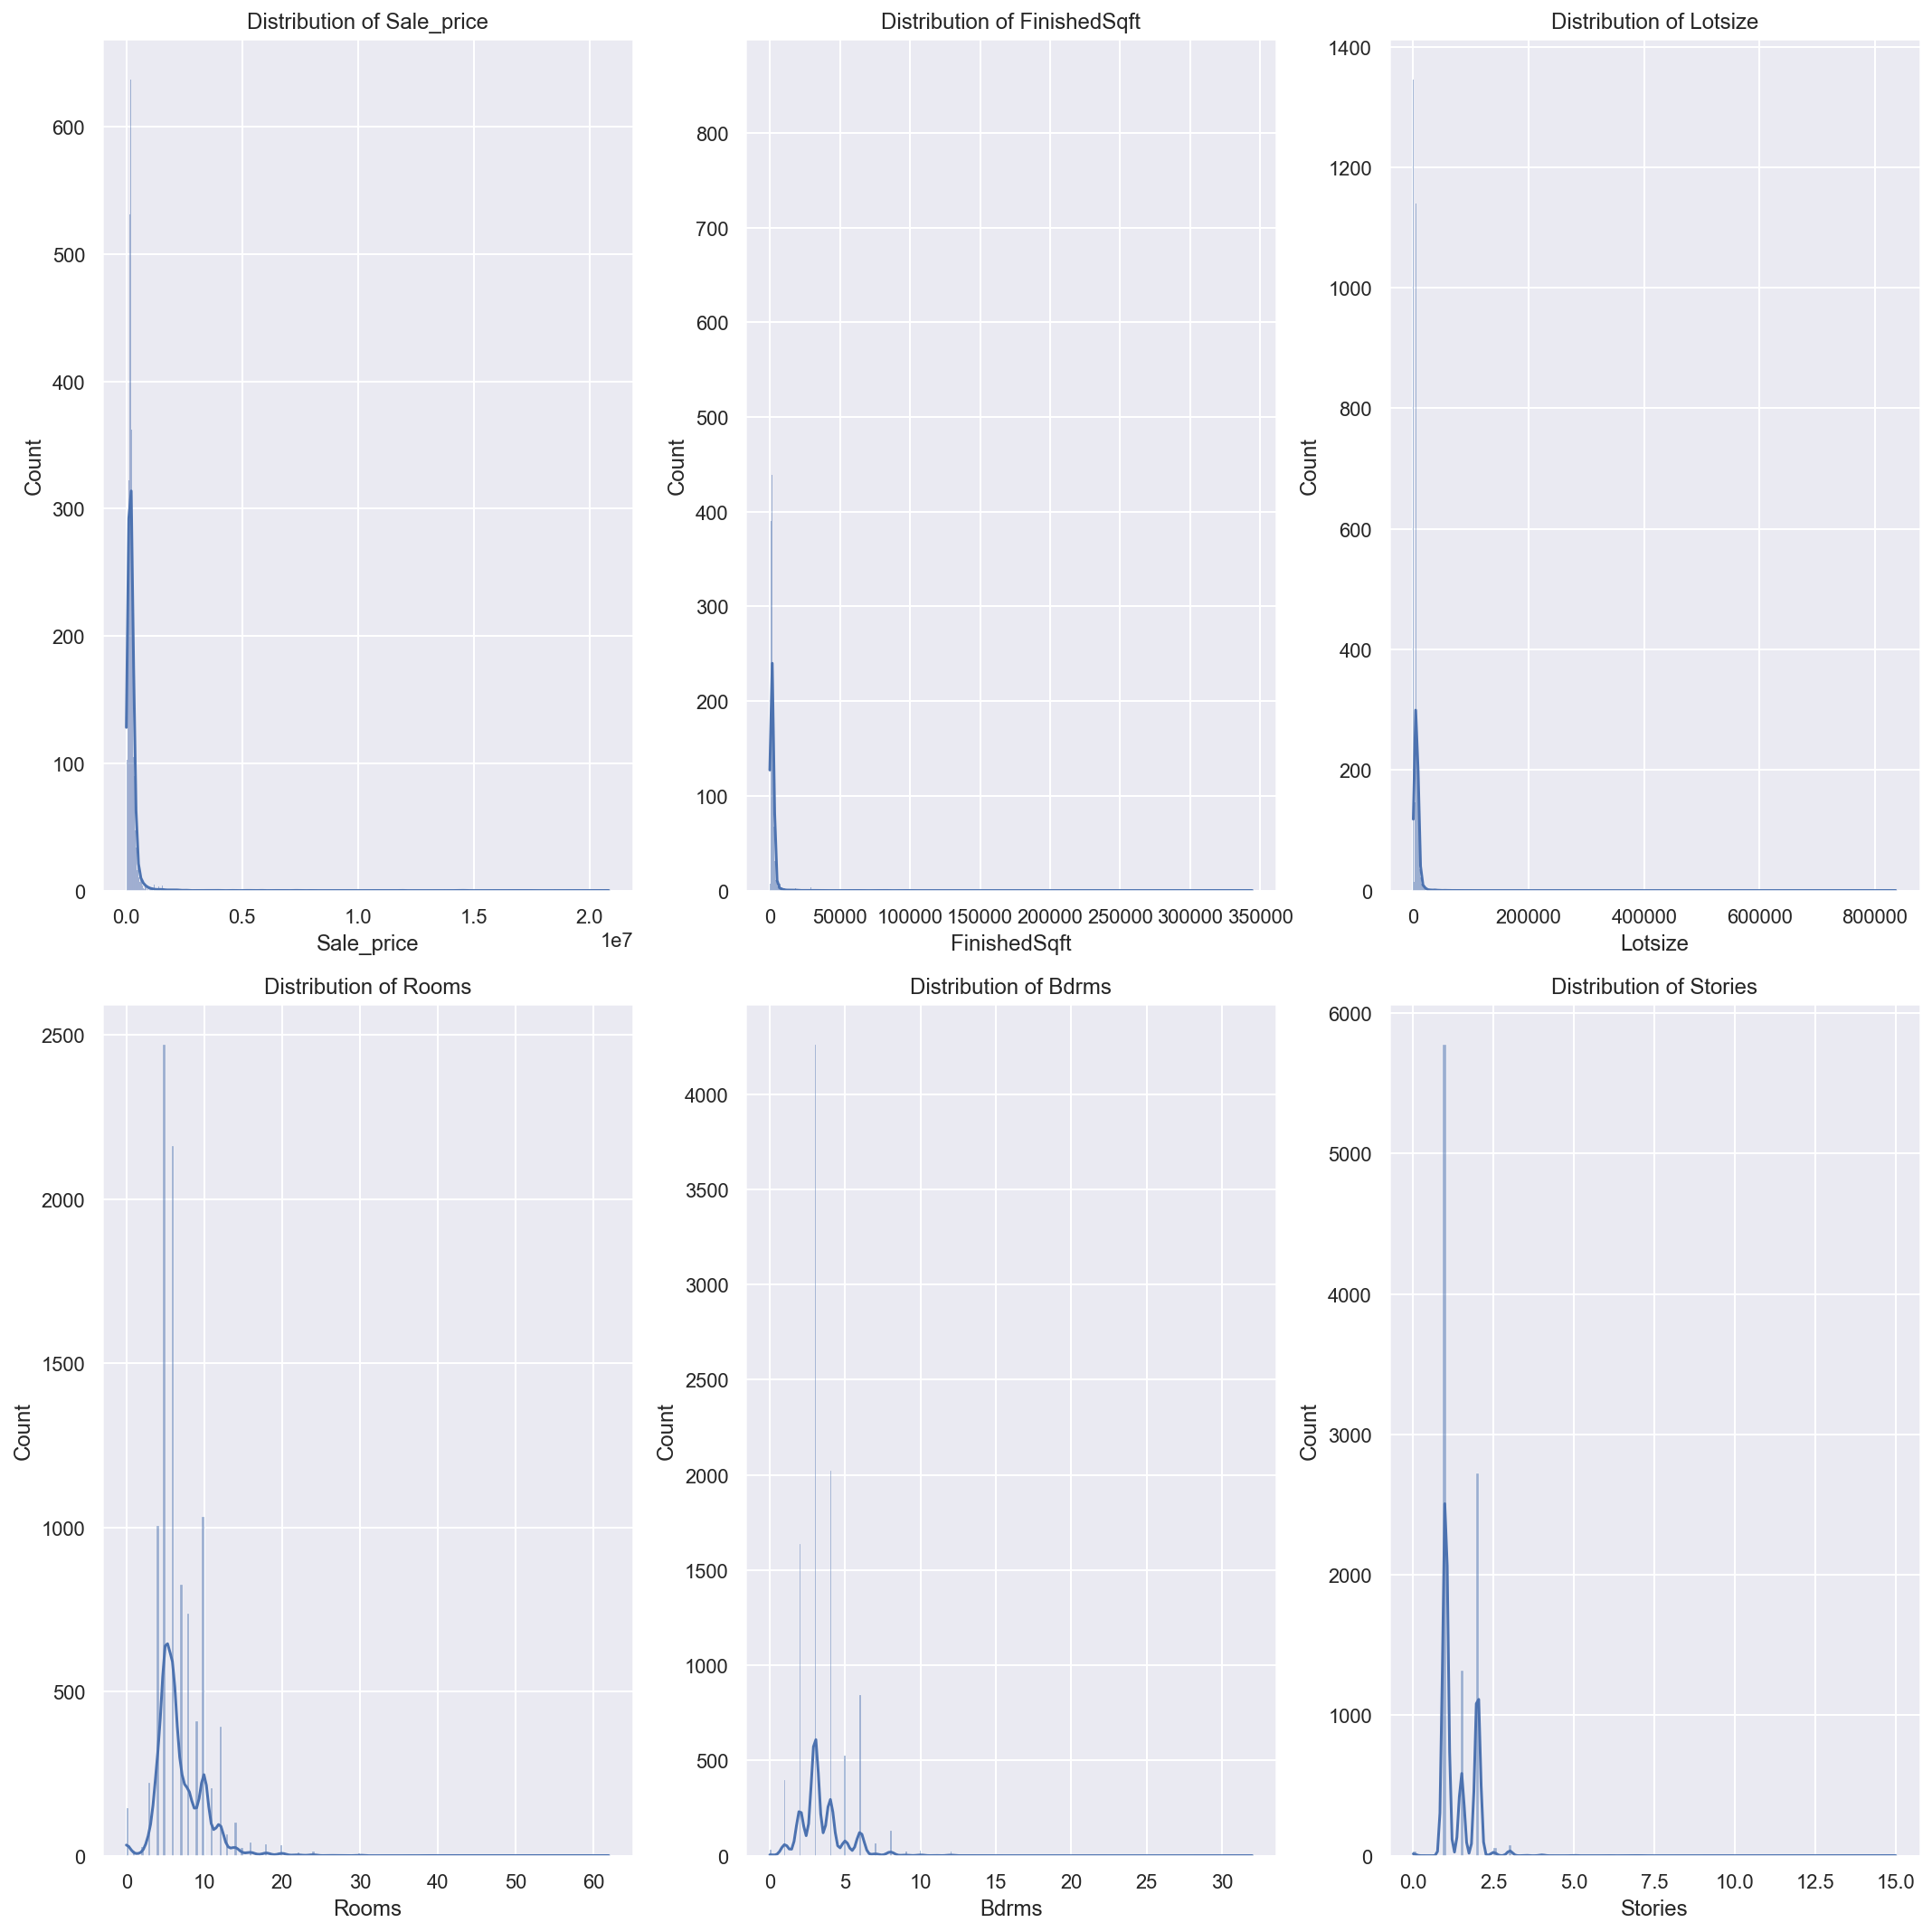

In [21]:
# 4. Visualize distributions of key numerical features
sample_data = property_sales_data.sample(n=10000, random_state=42)

key_features = ['Sale_price', 'FinishedSqft', 'Lotsize', 'Rooms', 'Bdrms', 'Stories']
plt.figure(figsize=(15, 15))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(sample_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [22]:
### Outlier detection and Treatment

In [23]:
# 1. Create a function to detect outliers using box plots
def plot_boxplots(df, features, rows=3, cols=3):
    plt.figure(figsize=(15, 15))
    for i, feature in enumerate(features):
        if i < rows * cols:
            plt.subplot(rows, cols, i+1)
            sns.boxplot(y=df[feature])
            plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

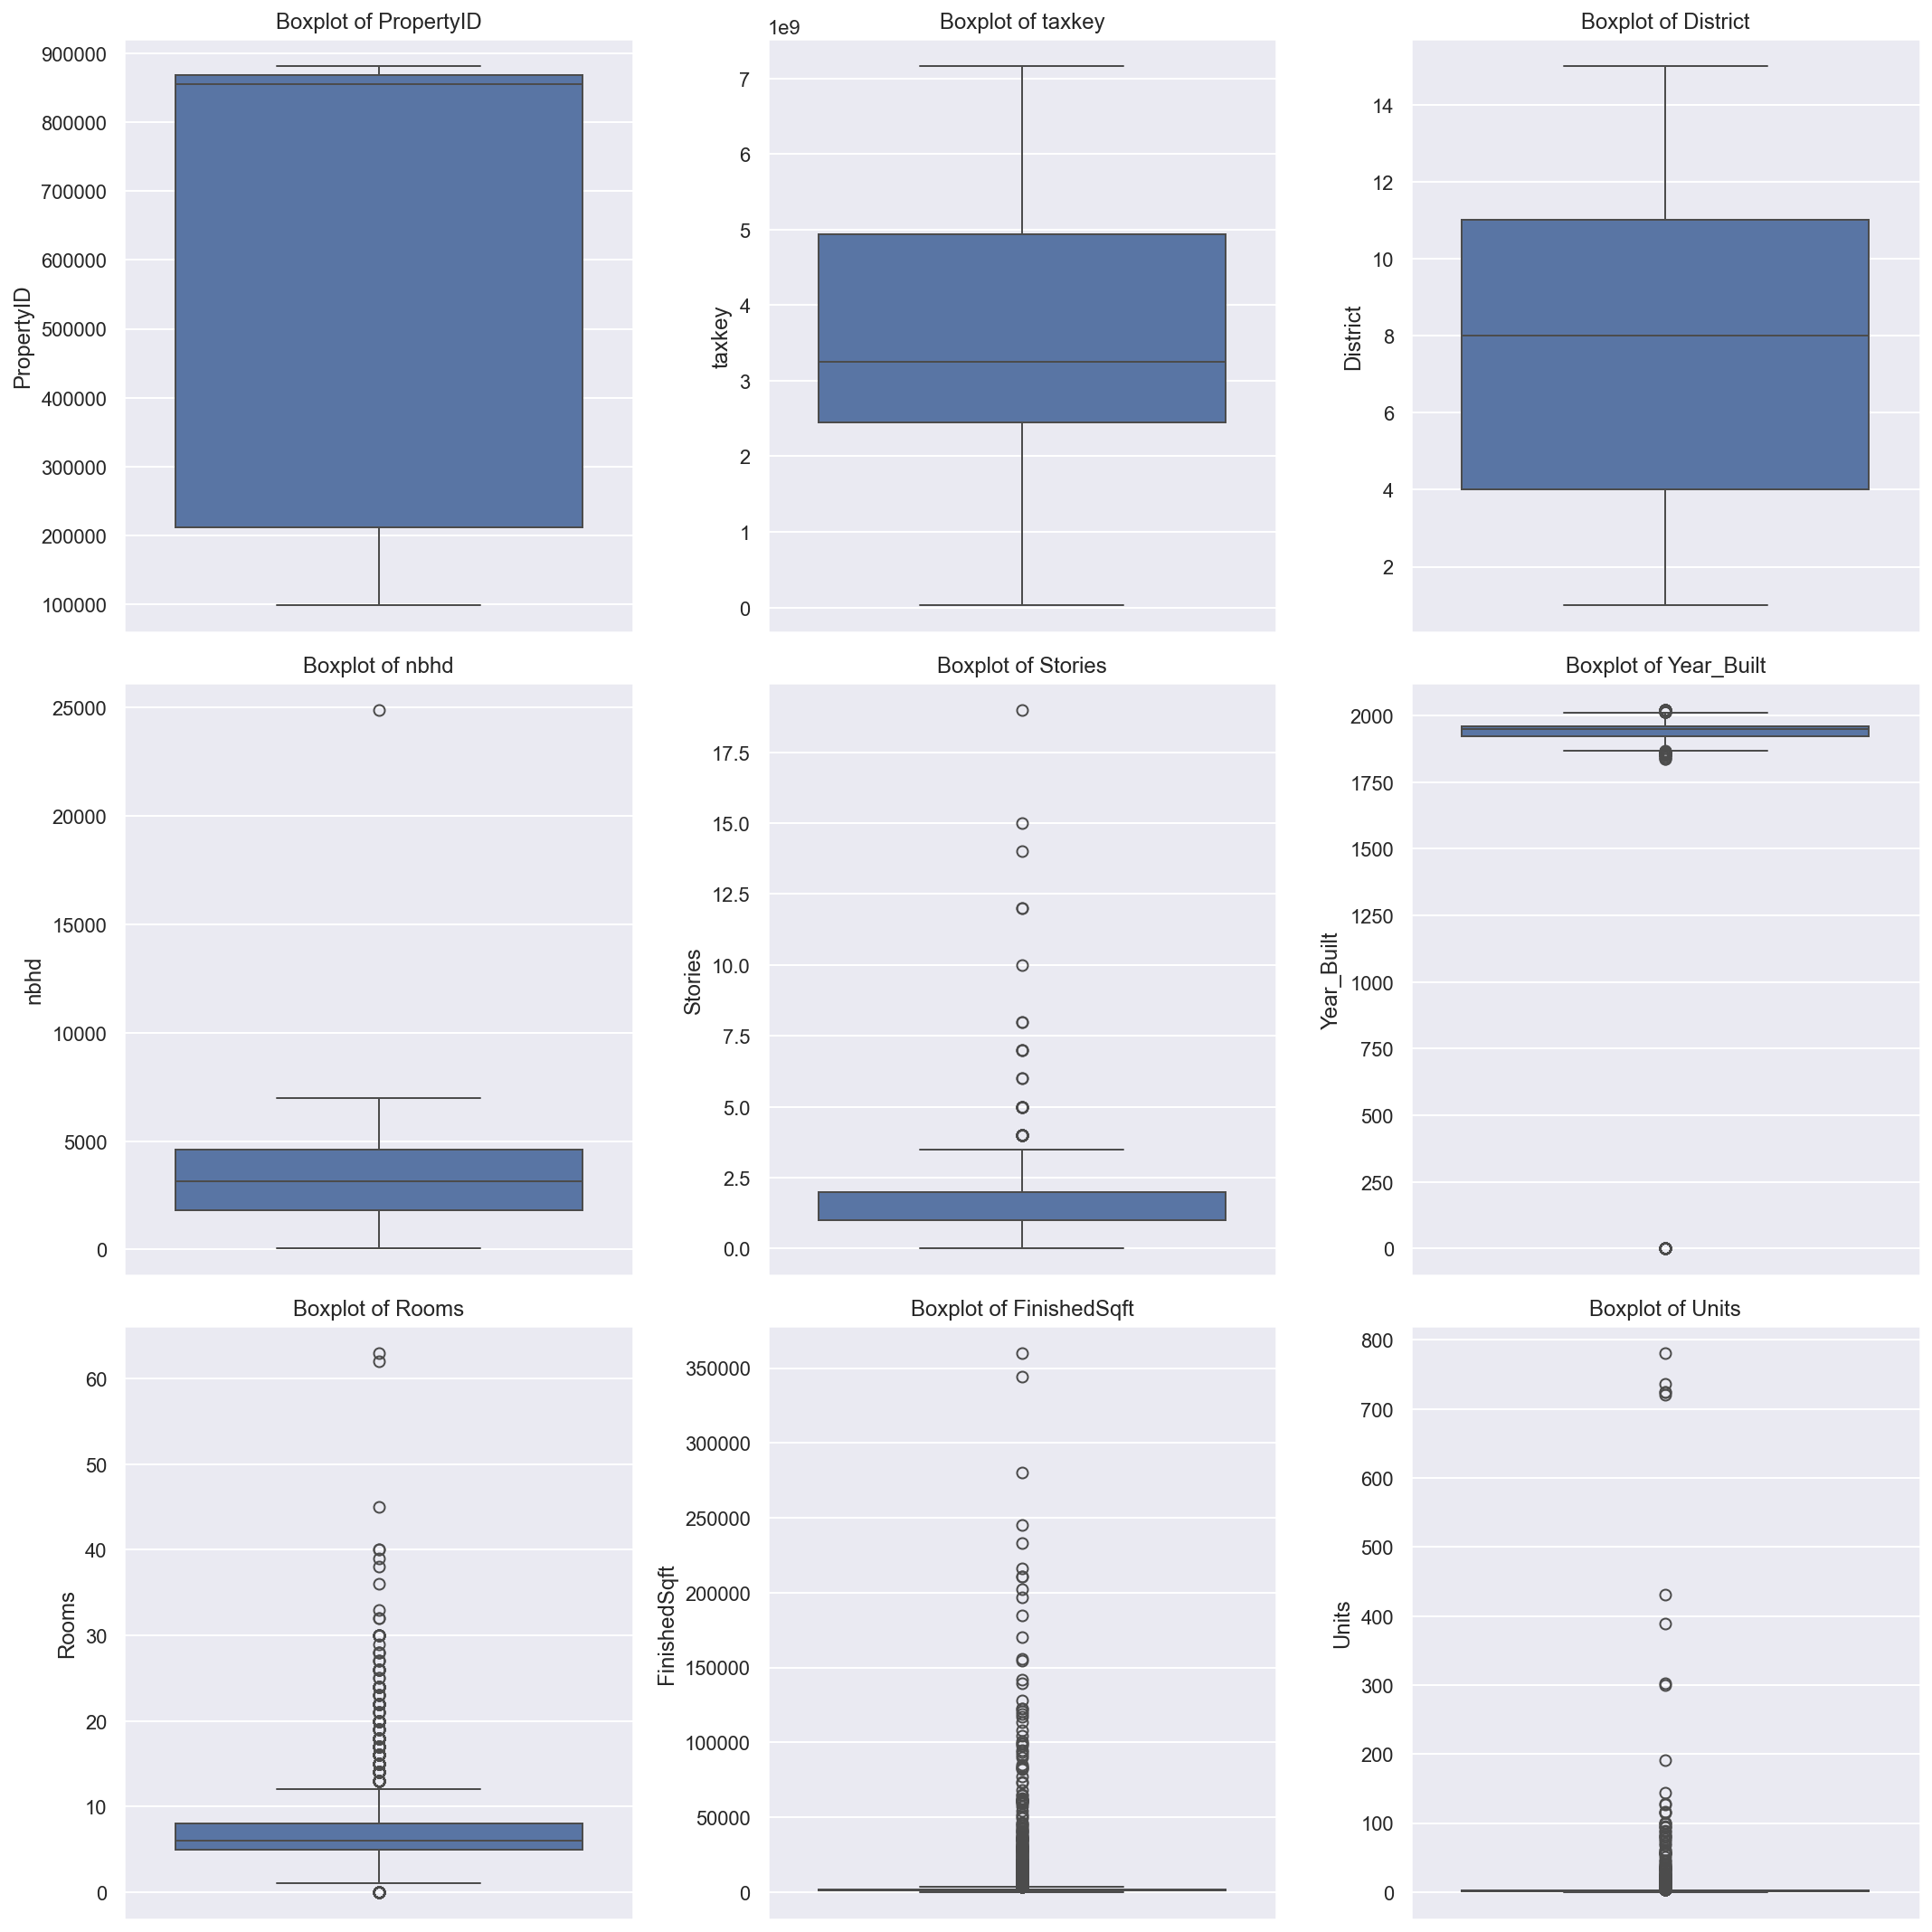

In [24]:
# 2. Plot boxplots for numerical features to identify outliers
numerical_features_subset = [f for f in numerical_features if f != 'Sale_price'][:9]
plot_boxplots(property_sales_data, numerical_features_subset)

In [25]:
# 3. Define function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

In [26]:
# 4. Create outlier summary for all numerical features
outlier_summary = pd.DataFrame(columns=['Feature', 'Number of Outliers', 'Percentage (%)', 'Lower Bound', 'Upper Bound'])

for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers(property_sales_data, feature)
    percentage = len(outliers) / len(property_sales_data) * 100
    
    outlier_summary = outlier_summary._append({
        'Feature': feature,
        'Number of Outliers': len(outliers),
        'Percentage (%)': percentage,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }, ignore_index=True)

print("\nOutlier summary:")
display(outlier_summary.sort_values('Percentage (%)', ascending=False))


Outlier summary:


,Feature,Number of Outliers,Percentage (%),Lower Bound,Upper Bound
9,Bdrms,2993,14.959016,1.500000e+00,5.500000e+00
13,Sale_price,1153,5.762695,-5.725000e+04,4.247500e+05
7,FinishedSqft,1133,5.662735,-2.490000e+02,3.287000e+03
6,Rooms,1006,5.027989,5.000000e-01,1.250000e+01
12,Lotsize,962,4.808077,-9.750000e+02,1.138500e+04
8,Units,839,4.193323,-5.000000e-01,3.500000e+00
5,Year_Built,128,0.639744,1.868000e+03,2.012000e+03
10,Fbath,119,0.594762,-5.000000e-01,3.500000e+00
4,Stories,36,0.179928,-5.000000e-01,3.500000e+00
11,Hbath,20,0.099960,-1.500000e+00,2.500000e+00


In [27]:
# 5. Define function to treat outliers
def treat_outliers(df, column, method='cap'):
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    
    if method == 'cap':
        # Cap the outliers at the bounds
        df[column] = np.where(
            df[column] > upper_bound,
            upper_bound,
            np.where(
                df[column] < lower_bound,
                lower_bound,
                df[column]
            )
        )
    elif method == 'remove':
        # Remove the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [28]:
# 6. Treat outliers for numerical features with significant outliers (e.g., > 5%)
for feature in outlier_summary[outlier_summary['Percentage (%)'] > 5]['Feature']:
    print(f"Treating outliers in {feature}")
    property_sales_data = treat_outliers(property_sales_data, feature, method='cap')

Treating outliers in Rooms
Treating outliers in FinishedSqft
Treating outliers in Bdrms
Treating outliers in Sale_price


In [29]:
# 7. Verify the impact of outlier treatment
for feature in outlier_summary[outlier_summary['Percentage (%)'] > 5]['Feature']:
    outliers_after, _, _ = detect_outliers(property_sales_data, feature)
    print(f"Feature {feature} now has {len(outliers_after)} outliers after treatment.")

Feature Rooms now has 0 outliers after treatment.
Feature FinishedSqft now has 0 outliers after treatment.
Feature Bdrms now has 0 outliers after treatment.
Feature Sale_price now has 0 outliers after treatment.


In [30]:
## Correlation Analysis

In [31]:
# 1. Compute correlation matrix for all numerical features
correlation_matrix = property_sales_data[numerical_features].corr(method='spearman')

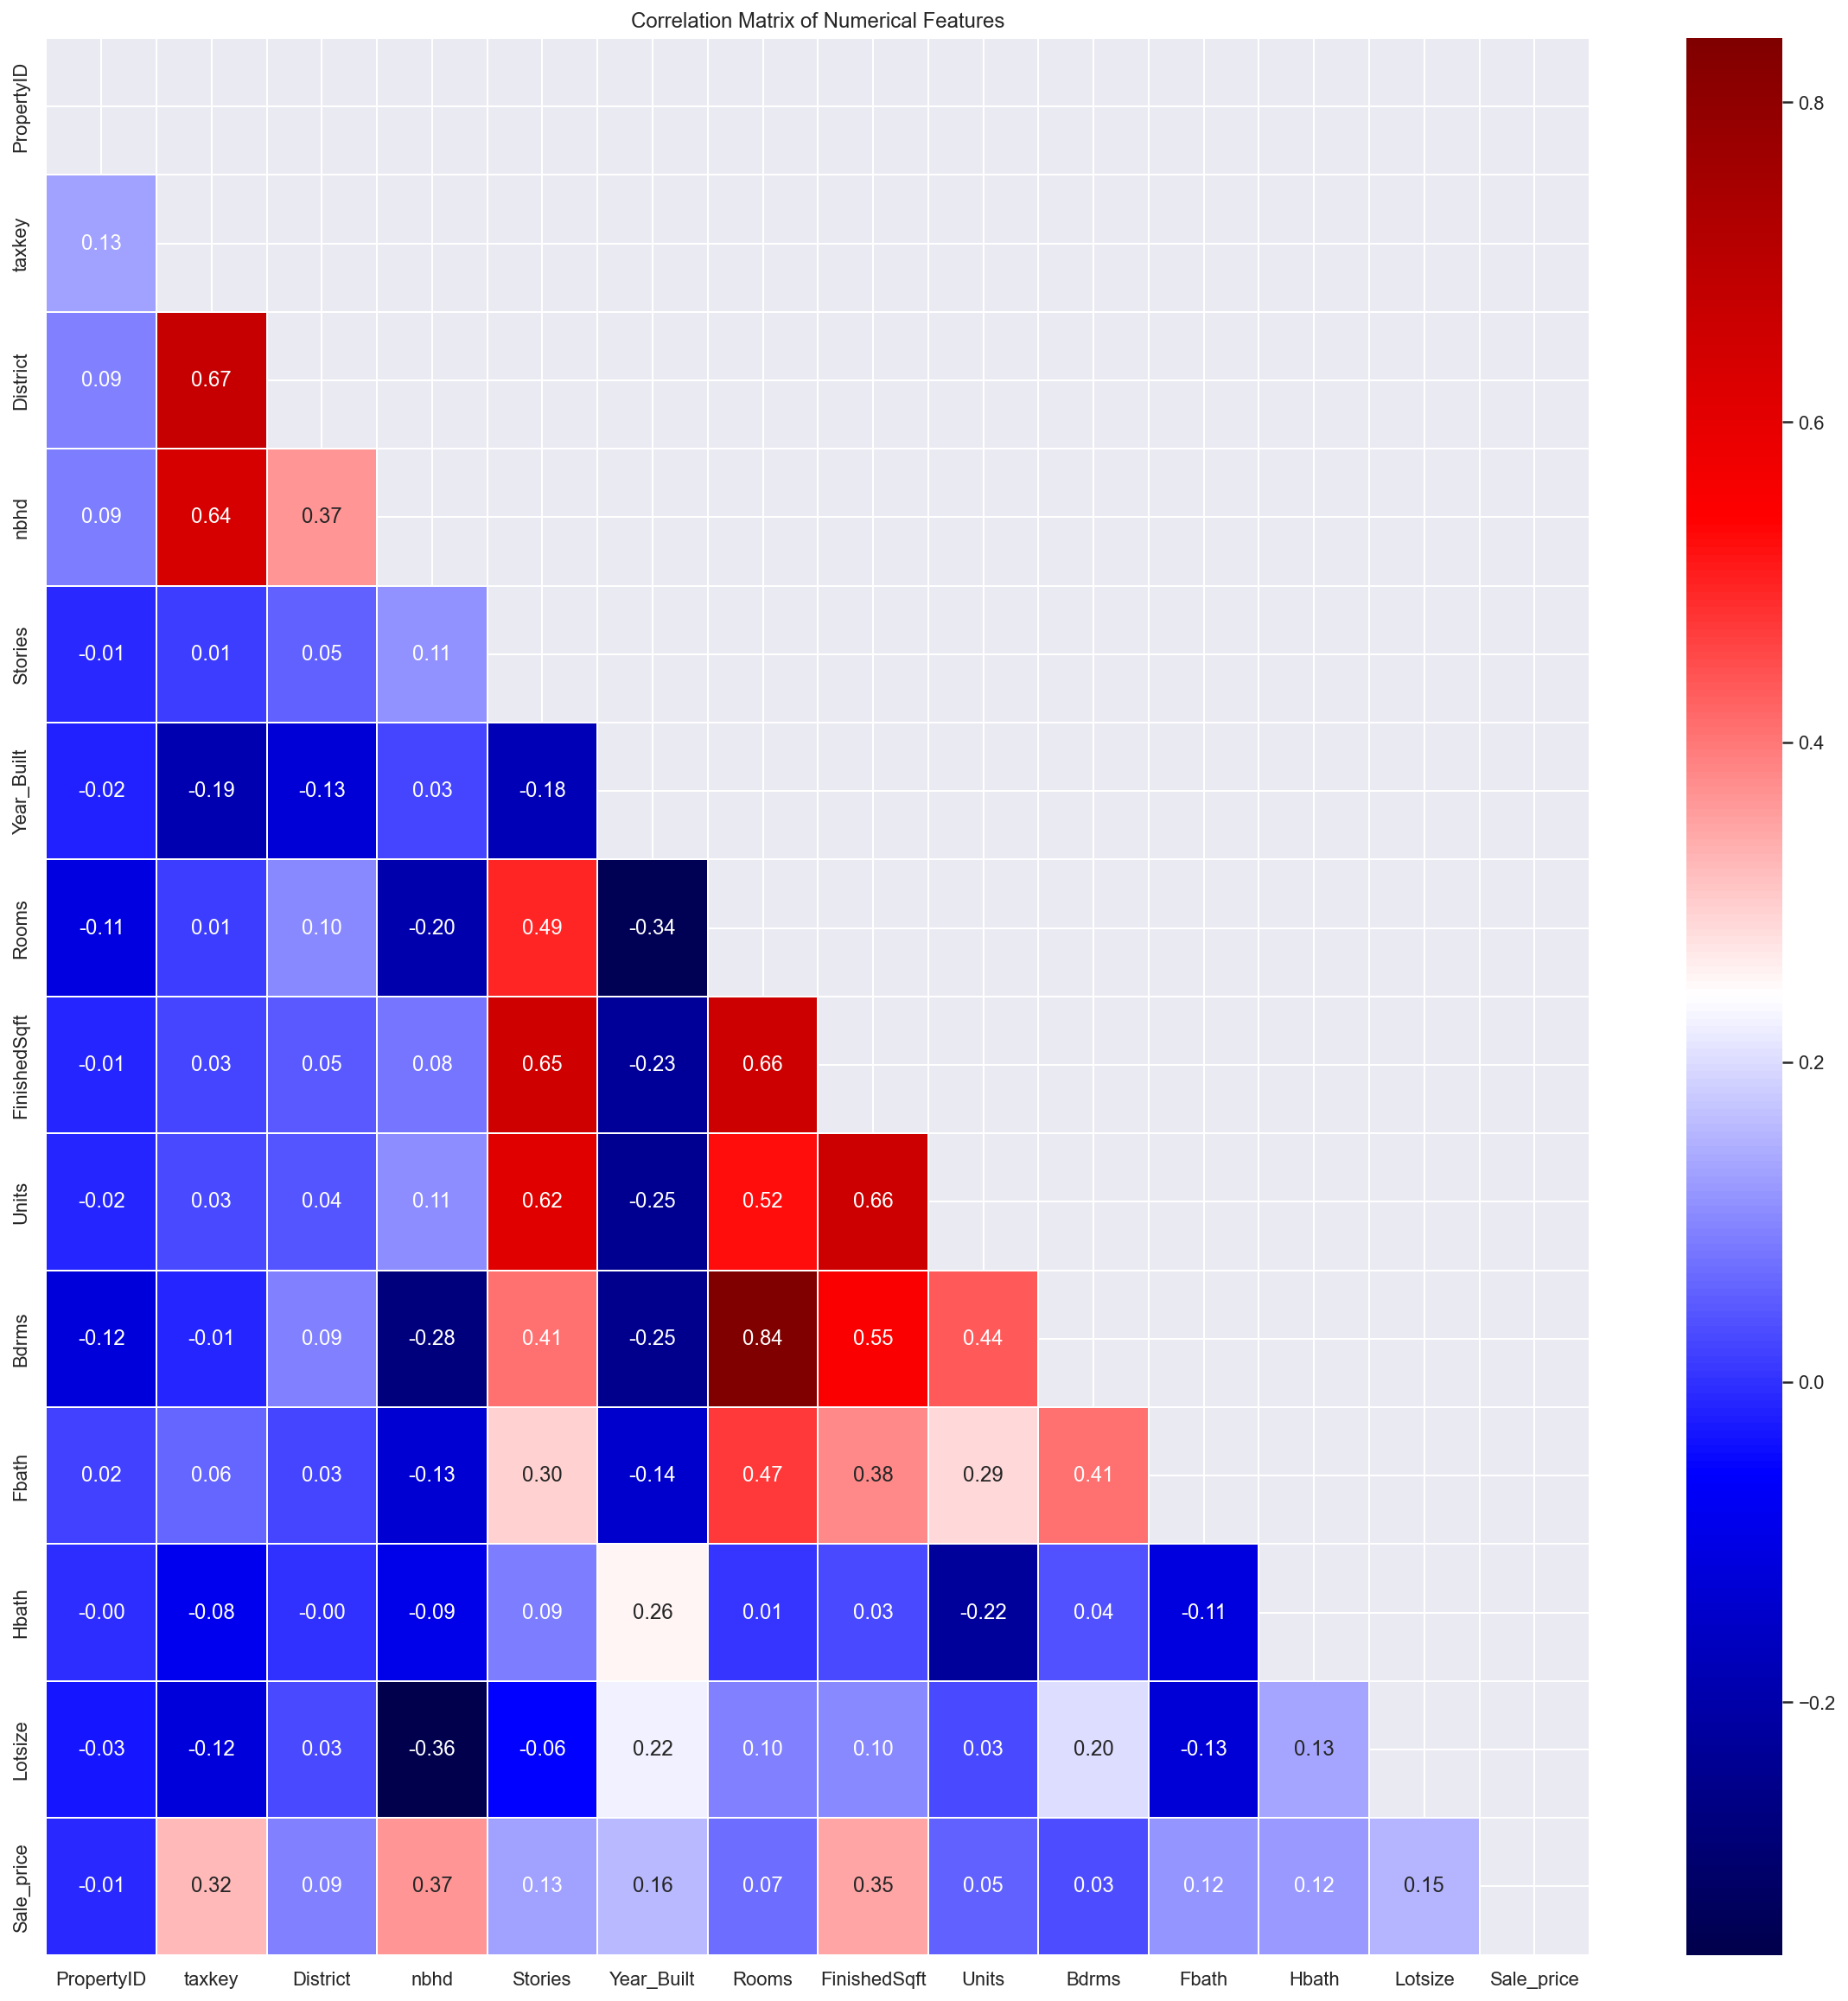

In [32]:
# 2. Visualize the correlation matrix
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='seismic', fmt='.2f', linewidth=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

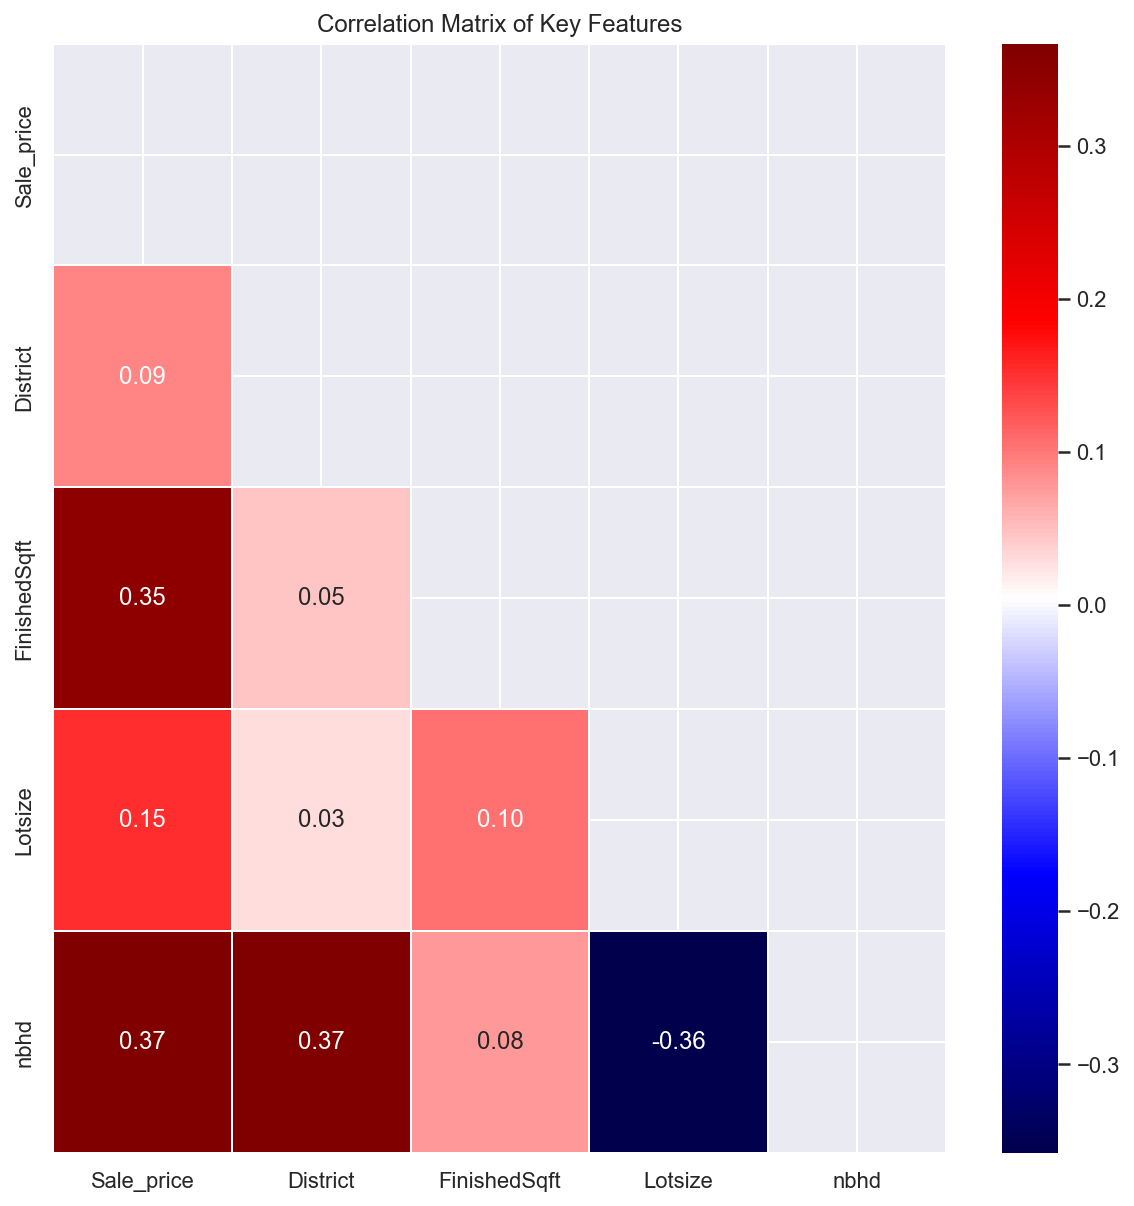

In [33]:
# 3. Focused correlation analysis with key features
key_features_corr = ['Sale_price', 'District', 'FinishedSqft', 'Lotsize', 'nbhd']
correlation_matrix_key = property_sales_data[key_features_corr].corr(method='spearman')

plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(correlation_matrix_key))
sns.heatmap(correlation_matrix_key, annot=True, mask=mask, cmap='seismic', fmt='.2f', linewidth=1)
plt.title('Correlation Matrix of Key Features')
plt.show()


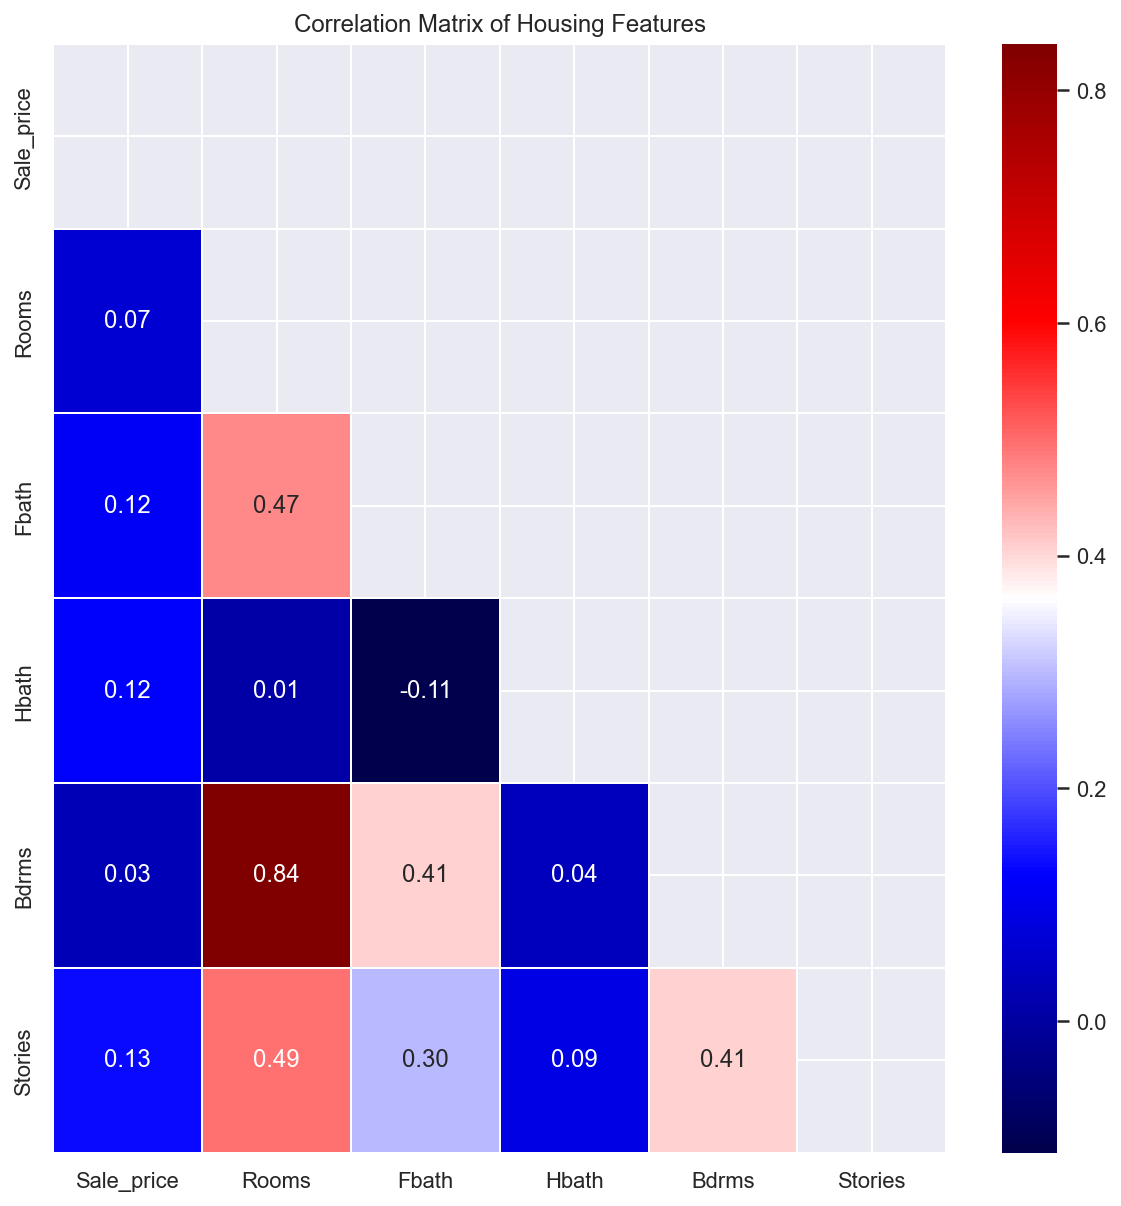

In [34]:
# 4. Compute correlation with housing-specific features
housing_features = ['Sale_price', 'Rooms', 'Fbath', 'Hbath', 'Bdrms', 'Stories']
correlation_matrix_housing = property_sales_data[housing_features].corr(method='spearman')

plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(correlation_matrix_housing))
sns.heatmap(correlation_matrix_housing, annot=True, mask=mask, cmap='seismic', fmt='.2f', linewidth=1)
plt.title('Correlation Matrix of Housing Features')
plt.show()

In [35]:
## Feature Relationships with Target

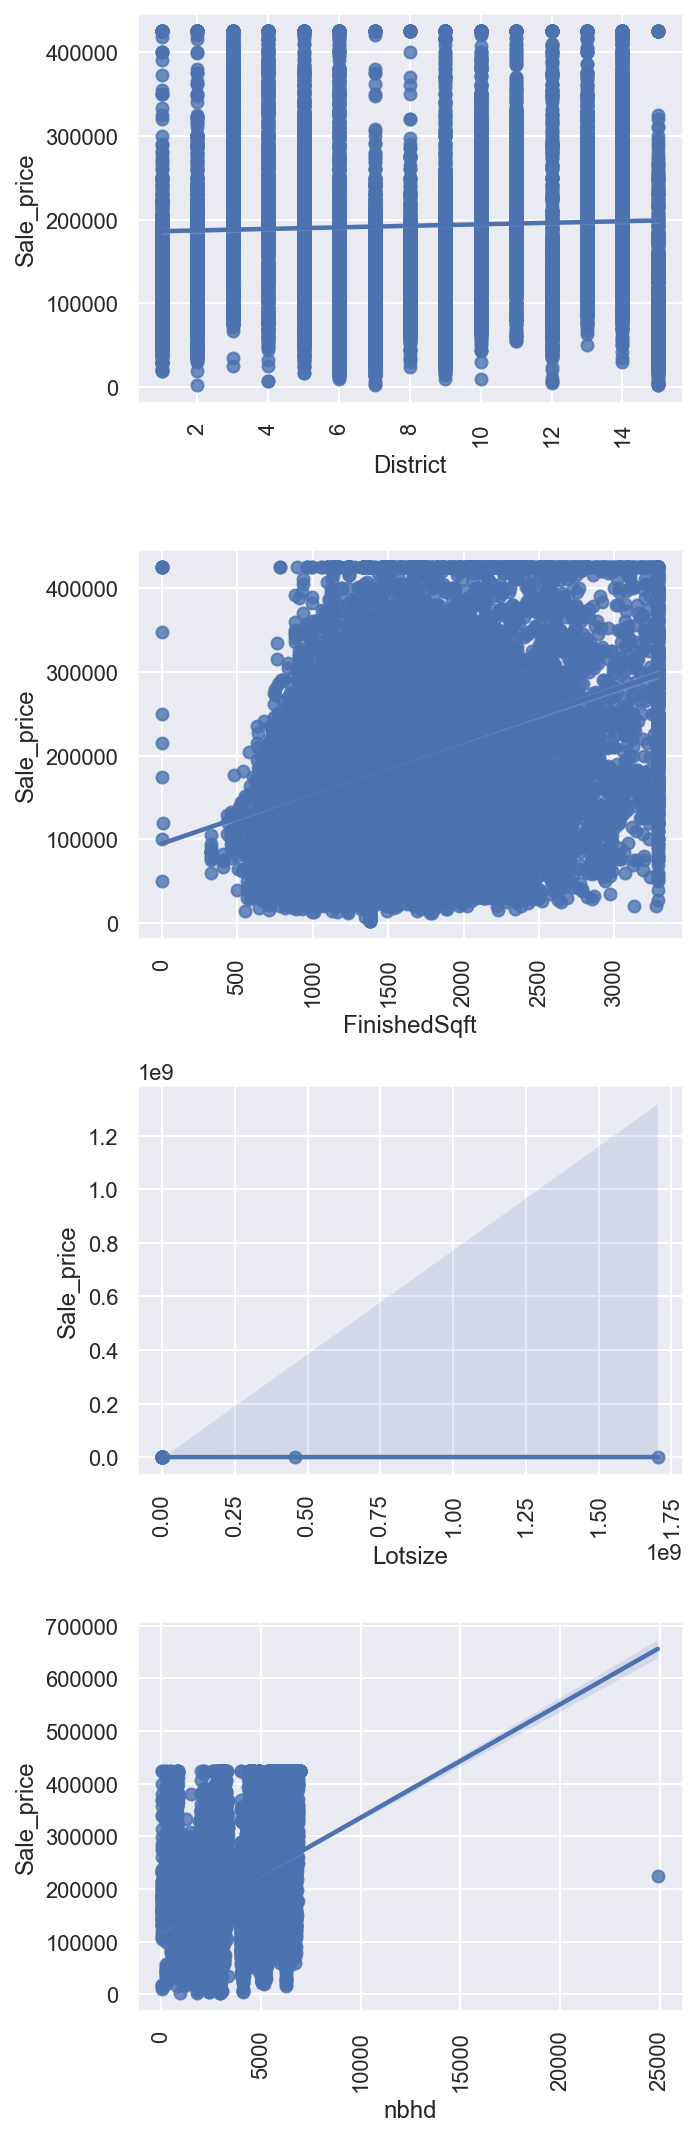

In [36]:
# 1. Create regression plots for key variables
fig, axes = plt.subplots(4, 1, figsize=(5, 15))
for variable, subplot in zip(['District', 'FinishedSqft', 'Lotsize', 'nbhd'], axes.flatten()):
    sns.regplot(data=property_sales_data, y='Sale_price', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

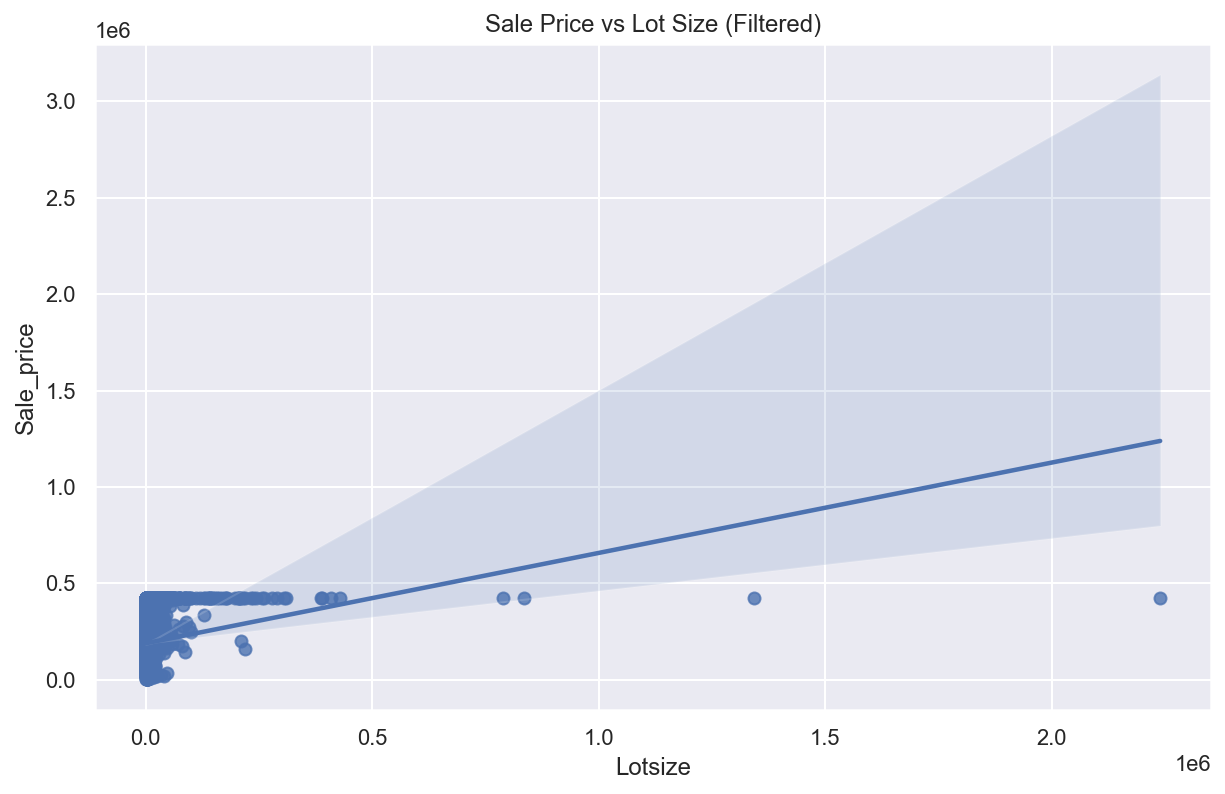

In [37]:
# 2. Filter and visualize Lotsize relationship (removing extreme values)
filtered_lotsize_data = property_sales_data[property_sales_data['Lotsize'] < 4*1e6]
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_lotsize_data, y='Sale_price', x='Lotsize')
plt.title('Sale Price vs Lot Size (Filtered)')
plt.show()

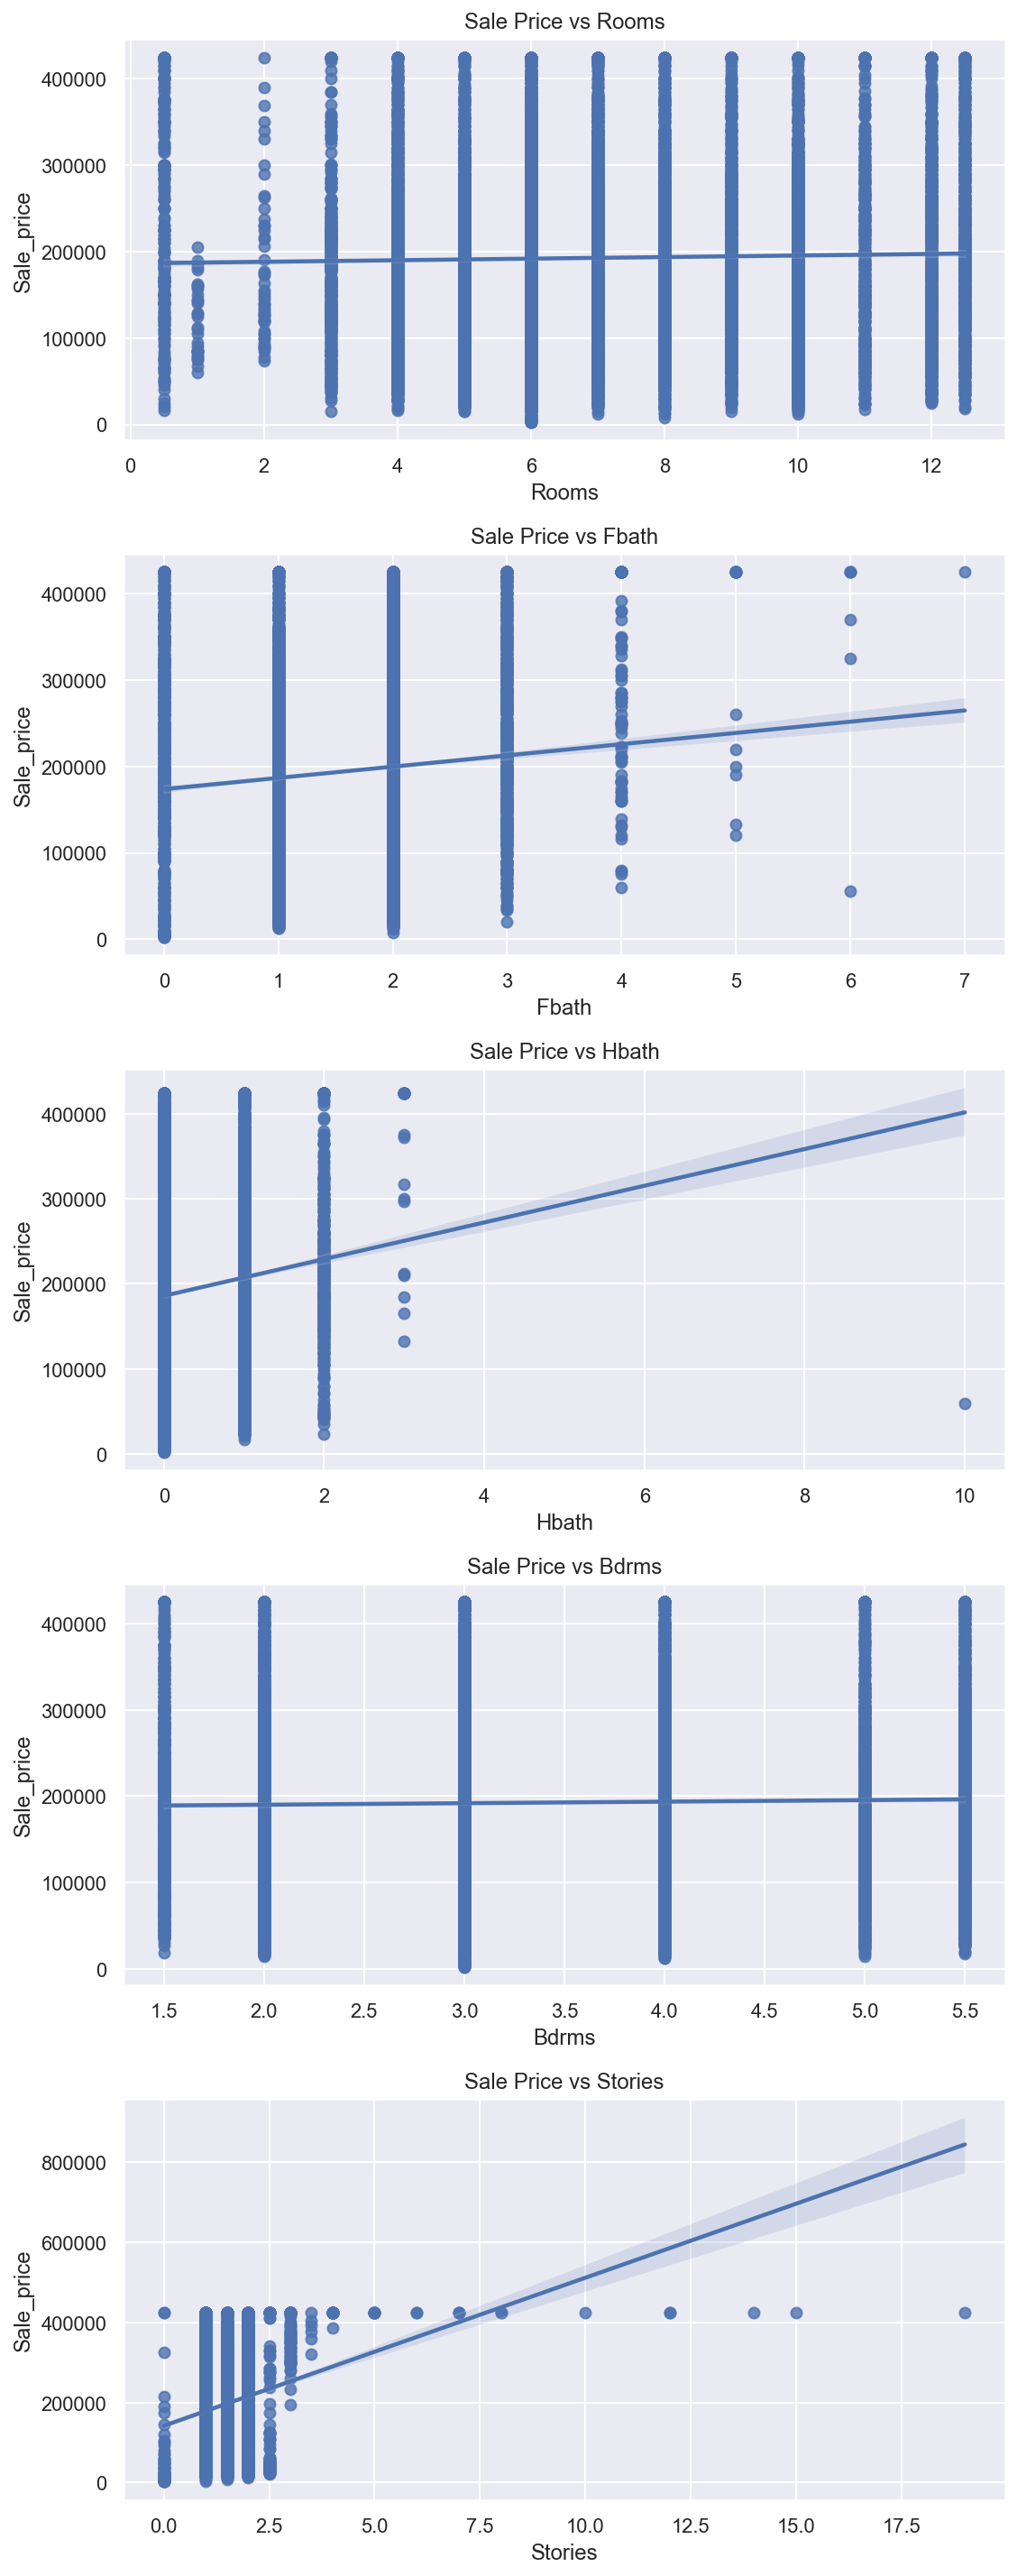

In [38]:
# 3. Visualize relationship with housing features
housing_vars = ['Rooms', 'Fbath', 'Hbath', 'Bdrms', 'Stories']
fig, axes = plt.subplots(len(housing_vars), 1, figsize=(8, 20))
for variable, subplot in zip(housing_vars, axes.flatten()):
    sns.regplot(data=property_sales_data, y='Sale_price', x=variable, ax=subplot)
    subplot.set_title(f'Sale Price vs {variable}')
plt.tight_layout()
plt.show()

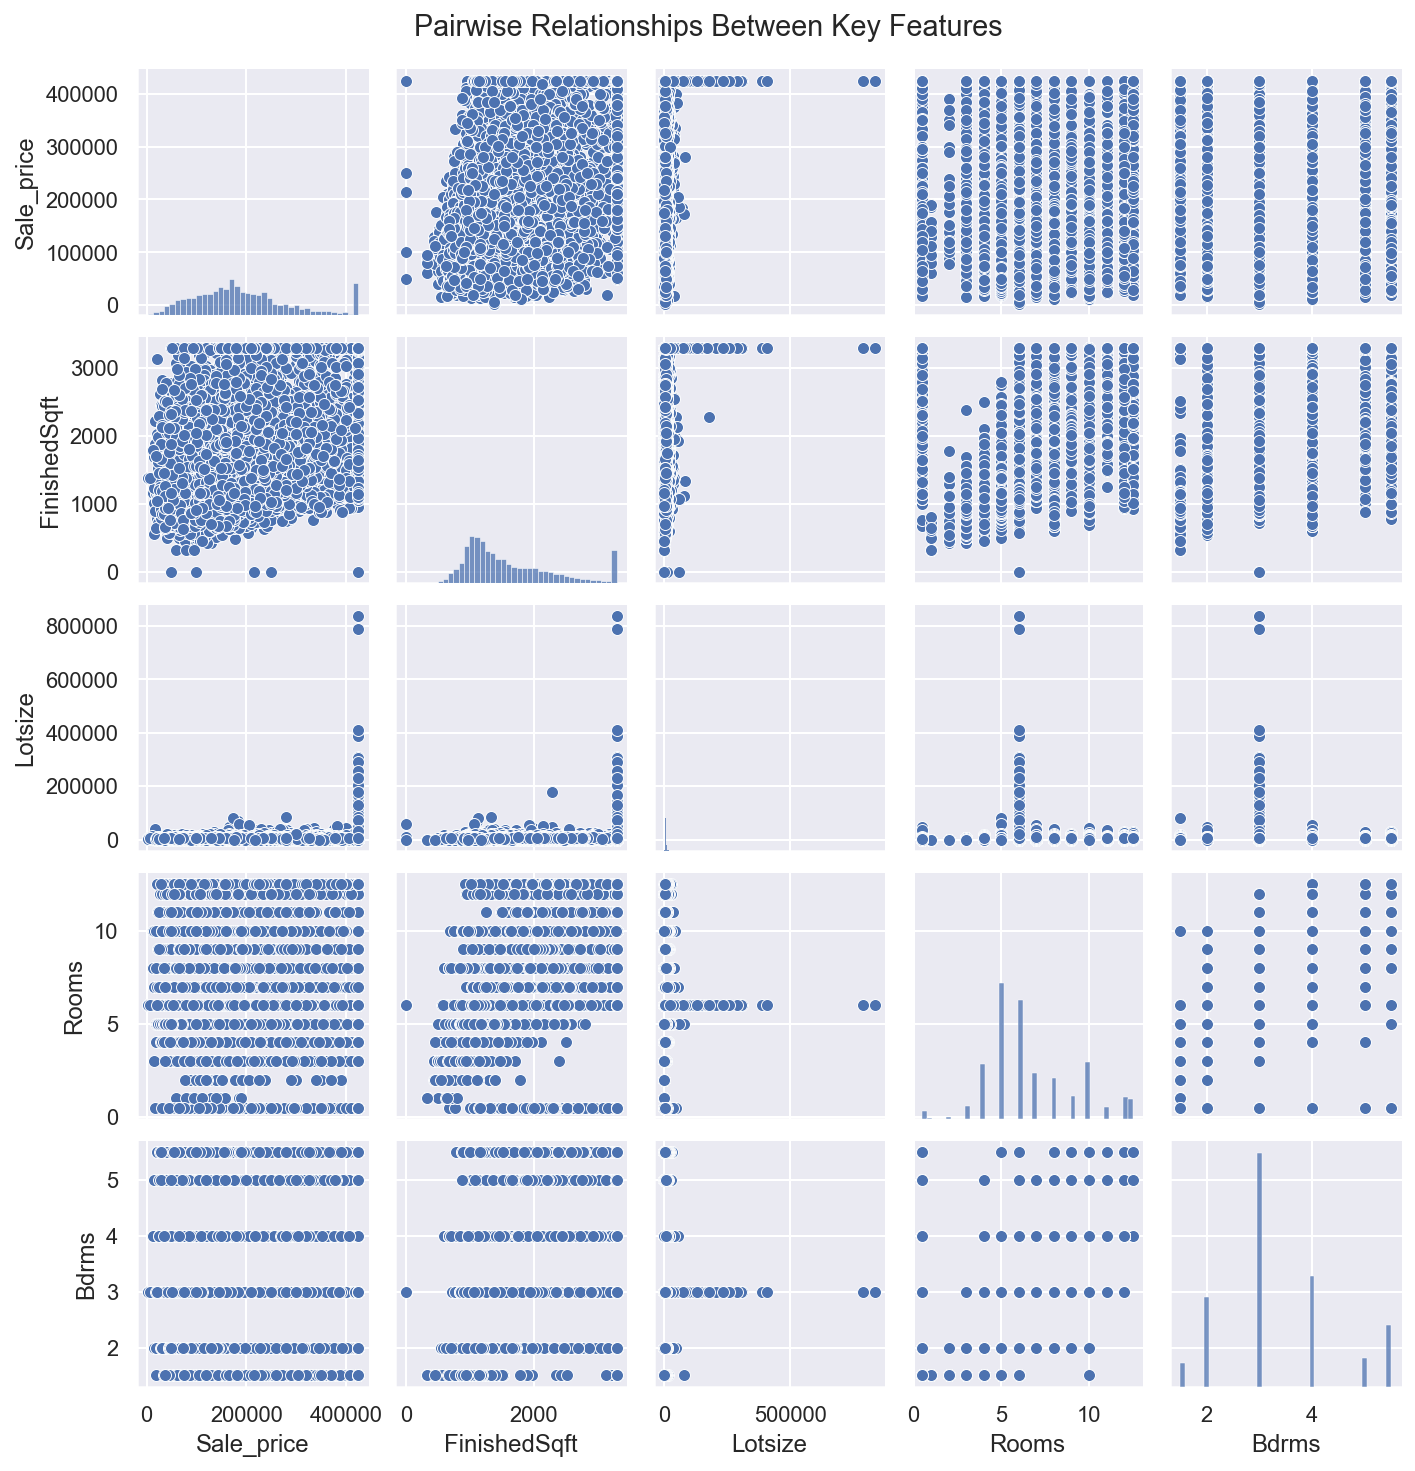

In [39]:
# 4. Create pairplot for key features
sample_data_pair = property_sales_data.sample(n=10000, random_state=42)
key_features_pair = ['Sale_price', 'FinishedSqft', 'Lotsize', 'Rooms', 'Bdrms']
sns.pairplot(sample_data_pair[key_features_pair], height=2)
plt.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

In [40]:
### Categorical Feature analysis

In [41]:
# 1. Preview categorical features
print("\nCategorical features preview:")
display(property_sales_data[categorical_features].head())



Categorical features preview:


,PropType,Address,CondoProject,Style,Extwall,Sale_date
0,Manufacturing,9434-9446 N 107TH ST,NaN,Service Building,Concrete Block,4/1/2022
1,Commercial,9306-9316 N 107TH ST,NaN,Office Building - 1 Story,Brick,10/7/2022
2,Residential,9327 N SWAN RD,NaN,Ranch,Aluminum/Vinyl,1/7/2022
3,Residential,9411 W COUNTY LINE RD,NaN,Ranch,Aluminum/Vinyl,8/9/2022
4,Residential,9322 N JOYCE AV,NaN,Ranch,Aluminum/Vinyl,5/23/2022


In [42]:
# 2. Get descriptive statistics for categorical features
print("\nCategorical features statistics:")
display(property_sales_data[categorical_features].describe(include=object).T)


Categorical features statistics:


,count,unique,top,freq
PropType,20008,6,Residential,16280
Address,20008,19018,5815 N 37TH ST,13
CondoProject,2586,279,LANDMARK ON THE LAKE,78
Style,20008,95,Ranch,4429
Extwall,20008,18,Aluminum/Vinyl,12399
Sale_date,20008,920,4/30/2021,94


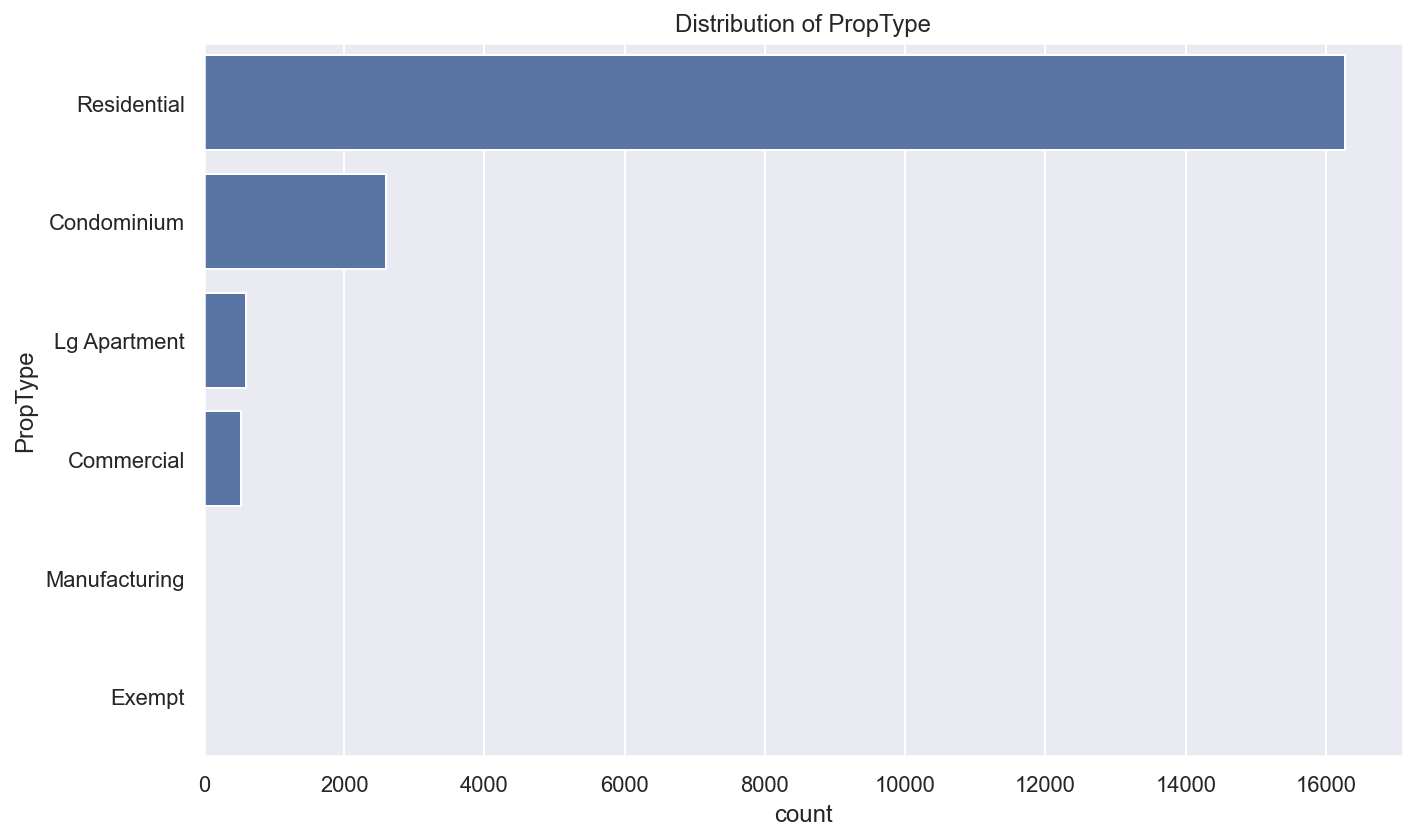

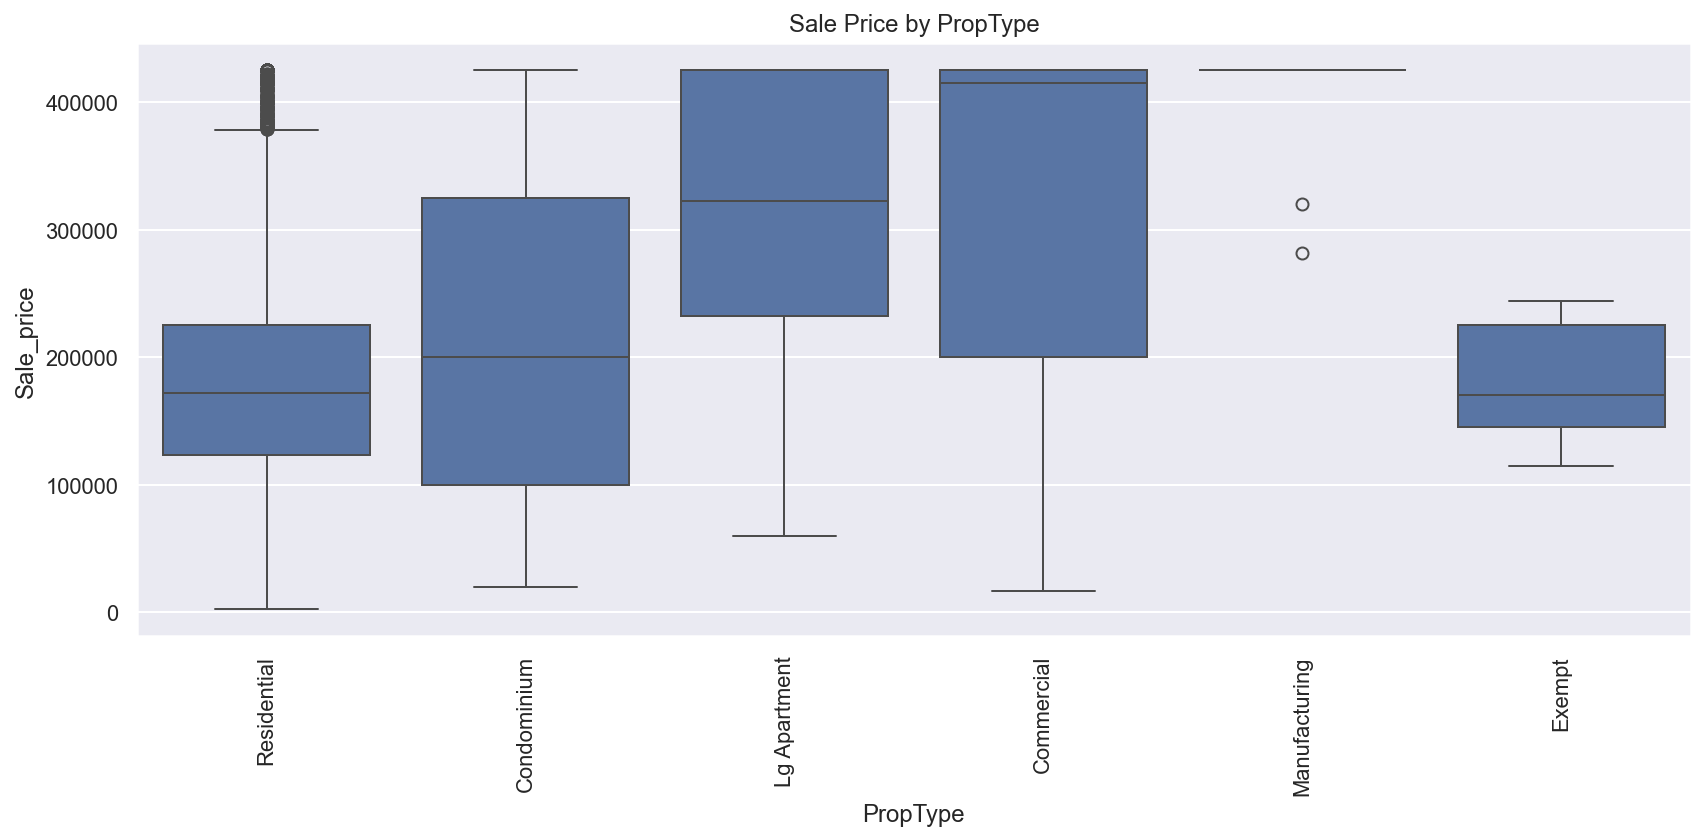

Address has 19018 unique values. Too many to plot.
Top 10 most frequent values: 
Address
5815 N 37TH ST                   13
3371 S 12TH ST                    8
777 N PROSPECT AV, Unit MID T     4
10939 W CAMERON AV                4
1235-1237 S CESAR E CHAVEZ DR     4
8727 N 72ND ST                    3
2207 N 38TH ST                    3
2623 N 24TH PL                    3
2657 N 55TH ST                    3
5343 N 62ND ST                    3
Name: count, dtype: int64
CondoProject has 279 unique values. Too many to plot.
Top 10 most frequent values: 
CondoProject
LANDMARK ON THE LAKE         78
WOODLANDS                    64
MILL VALLEY                  59
POINT ON THE RIVER CONDOS    58
RIVERBRIDGE                  56
BLATZ                        55
WILLOW CREEK                 54
HARBOR FRONT                 42
BROADWAY CONDOMINIUM         42
SERVITE WOODS (ATRIUM)       41
Name: count, dtype: int64
Style has 95 unique values. Too many to plot.
Top 10 most frequent values: 
Style


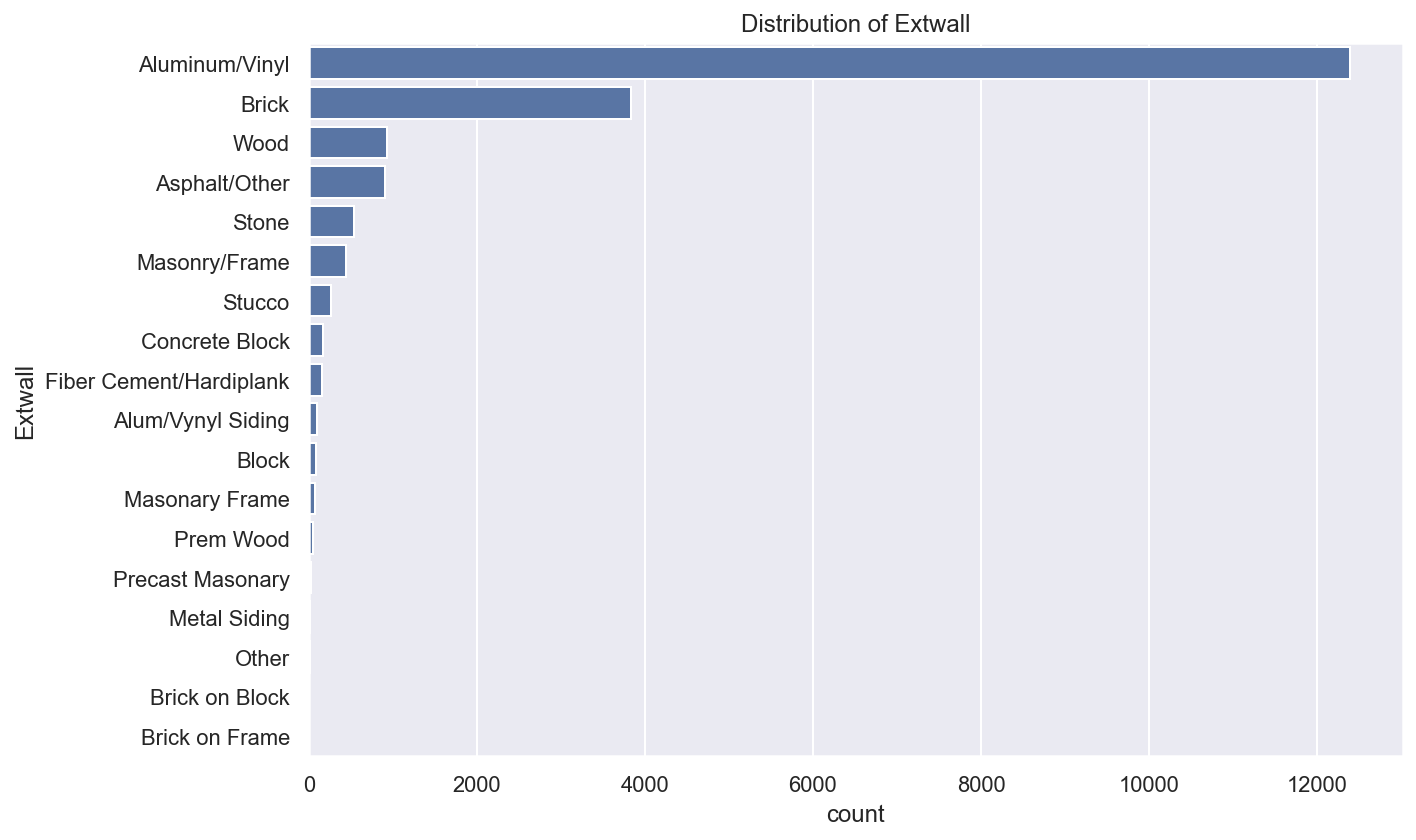

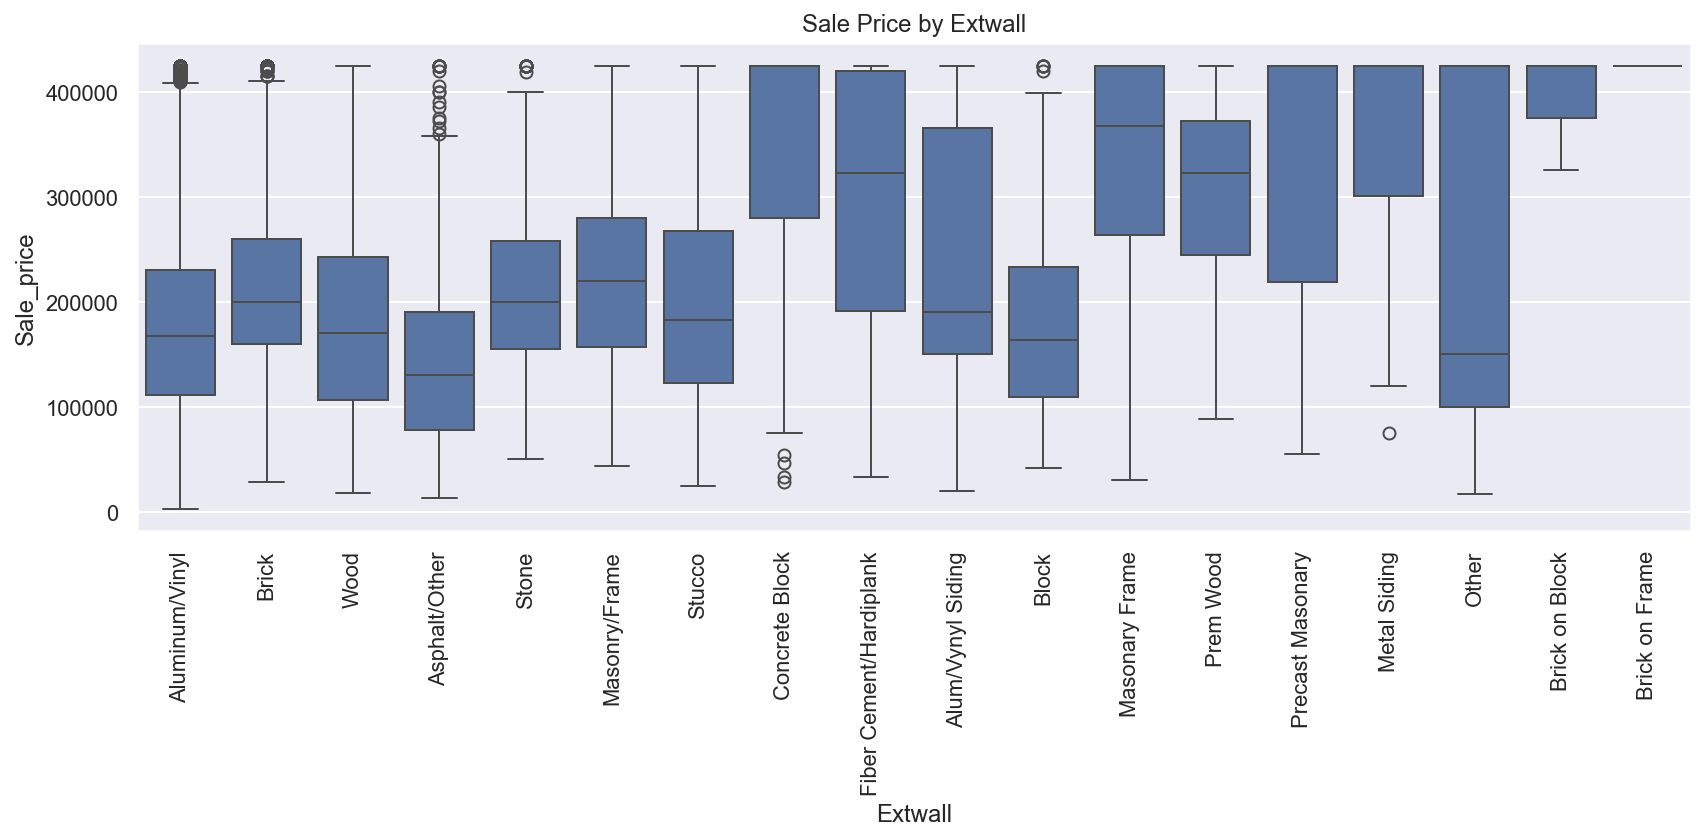

Sale_date has 920 unique values. Too many to plot.
Top 10 most frequent values: 
Sale_date
4/30/2021     94
10/30/2020    86
5/28/2021     79
6/30/2021     73
5/14/2021     72
7/30/2021     68
7/31/2020     64
2/28/2022     64
11/30/2020    63
6/30/2022     63
Name: count, dtype: int64


In [43]:
# 3. Analyze each categorical feature
for feature in categorical_features:
    value_counts = property_sales_data[feature].value_counts()
    
    # Only plot if there aren't too many categories
    if len(value_counts) <= 20:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=property_sales_data[feature], order=value_counts.index)
        plt.title(f'Distribution of {feature}')
        plt.tight_layout()
        plt.show()
        
        # Also show the relationship with the target variable
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=feature, y='Sale_price', data=property_sales_data, order=value_counts.index)
        plt.title(f'Sale Price by {feature}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{feature} has {len(value_counts)} unique values. Too many to plot.")
        print(f"Top 10 most frequent values: \n{value_counts.head(10)}")

In [44]:
##### Feature Engineering

In [45]:
# 1. Bin continuous features into categories

# Binning nbhd (neighborhood) feature
def bin_area(x):
    if (x > 0) and (x <= 1.09*1e3):
        return '1'
    elif (x > 1.09*1e3) and (x <= 1.28*1e3):
        return '2'
    elif (x > 1.28*1e3) and (x <= 1.638*1e3):
        return '3'
    elif (x > 1.638*1e3):
        return '4'
    else:
        return 'Unknown'

property_sales_data['livable_bin'] = property_sales_data['nbhd'].apply(bin_area)

In [46]:
# Calculate statistics by livable_bin
grouped_sales_stats = property_sales_data.groupby('livable_bin')['Sale_price'].describe()
print("\nSale price statistics by livable area bin:")
display(grouped_sales_stats)


Sale price statistics by livable area bin:


,count,mean,std,min,25%,50%,75%,max
livable_bin,,,,,,,,
1,2054.0,175697.229309,73195.616067,2500.0,131000.0,165200.0,210000.0,424750.0
2,708.0,106249.025424,45393.984255,16500.0,69975.0,100000.0,139225.0,332600.0
3,1734.0,136471.306228,48131.314823,20000.0,100000.0,136500.0,169000.0,380000.0
4,15512.0,204889.152269,103103.715694,2500.0,132000.0,191350.0,260000.0,424750.0


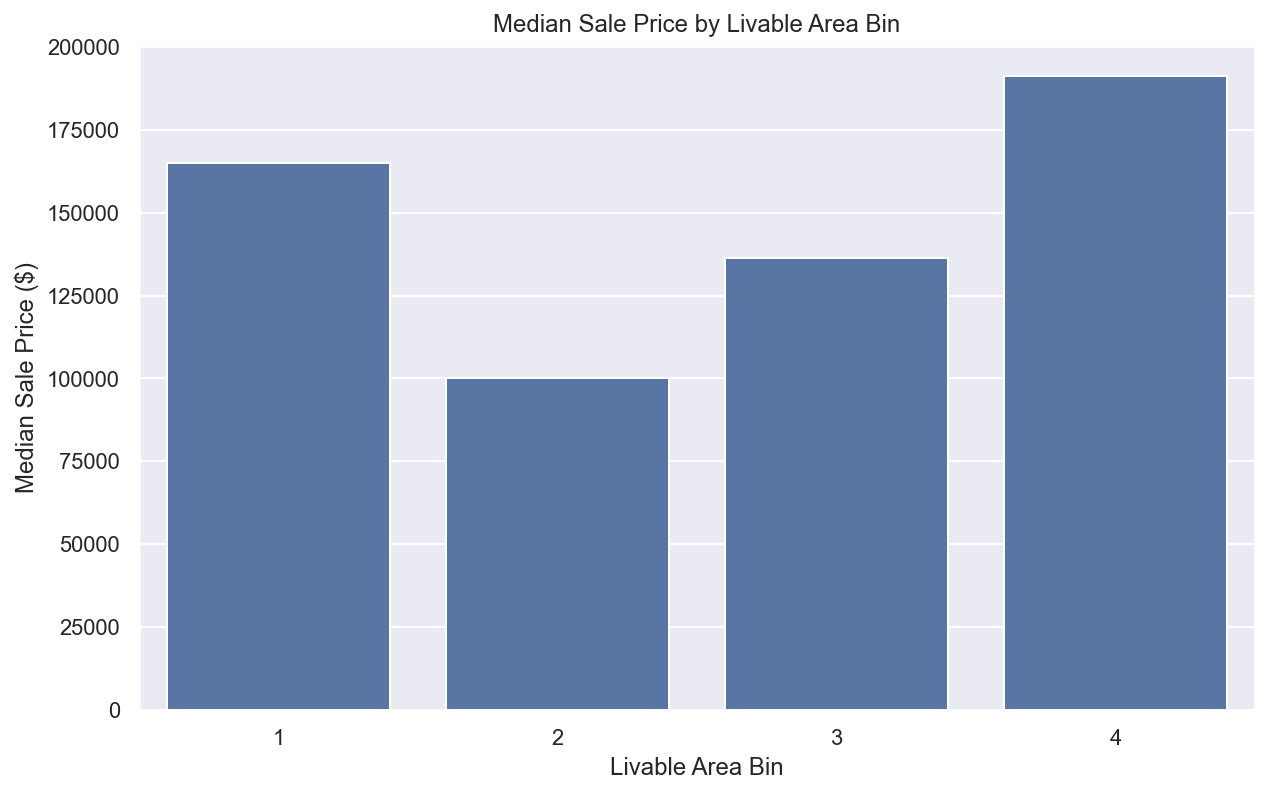

In [47]:
# Visualize median sale price by livable_bin
median_sale_price = grouped_sales_stats['50%'].reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='livable_bin', y='50%', data=median_sale_price)
plt.title('Median Sale Price by Livable Area Bin')
plt.xlabel('Livable Area Bin')
plt.ylabel('Median Sale Price ($)')
plt.show()

In [48]:
# 2. Bin bedroom count
def bin_bedroom(x):
    if (x > 0) and (x <= 2):
        return '0-2'
    elif (x > 2) and (x <= 5):
        return '3-5'
    elif (x > 6) and (x <= 8):
        return '7/8'
    elif x > 8:
        return '>8'
    else:
        return 'Unknown'

property_sales_data['number_bedroom_bin'] = property_sales_data['Bdrms'].apply(bin_bedroom)

In [49]:
# Analyze lot size by bedroom count
bedroom_lotsize_stats = property_sales_data.groupby('number_bedroom_bin')['Lotsize'].describe()
print("\nLot size statistics by bedroom count:")
display(bedroom_lotsize_stats)


Lot size statistics by bedroom count:


,count,mean,std,min,25%,50%,75%,max
number_bedroom_bin,,,,,,,,
0-2,4213.0,2911.019938,4.194852e+03,0.0,0.0,1830.0,5160.0,1.010590e+05
3-5,13635.0,165851.455299,1.510140e+07,0.0,4320.0,5280.0,7200.0,1.703065e+09
Unknown,2160.0,5900.146296,3.037105e+03,0.0,4367.5,5284.5,7128.0,5.865000e+04


In [50]:
# 3. Bin District (condition) feature
def bin_condition(x):
    if (x > 0) and (x <= 2):
        return 'Best Condition'
    elif (x > 2) and (x <= 3):
        return 'Above Average'
    elif (x > 3) and (x < 5):
        return 'Average Condition'
    elif (x >= 5) and (x < 6):
        return 'Below Average'
    elif (x >= 6) and (x <= 7):
        return 'Bad Condition'
    else:
        return 'None'

property_sales_data['overall_condition_bin'] = property_sales_data['District'].apply(bin_condition)

In [51]:
# Analyze sale price by property condition
grouped_sale_price_stats = property_sales_data.groupby('overall_condition_bin')['Sale_price'].describe()
print("\nSale price statistics by property condition:")
display(grouped_sale_price_stats)


Sale price statistics by property condition:


,count,mean,std,min,25%,50%,75%,max
overall_condition_bin,,,,,,,,
Above Average,1478.0,286789.704330,101304.910325,25500.0,213000.0,280000.0,380000.0,424750.0
Average Condition,968.0,291813.358471,121068.187724,7500.0,195000.0,285000.0,424750.0,424750.0
Bad Condition,2325.0,139617.328172,94699.874067,2800.0,70000.0,120000.0,175000.0,424750.0
Below Average,2209.0,196834.415120,75837.494239,17000.0,150000.0,185000.0,230000.0,424750.0
Best Condition,2720.0,137083.160294,67370.591396,2500.0,91000.0,130000.0,165000.0,424750.0
None,10308.0,195222.542976,89279.496795,2500.0,136000.0,185500.0,244900.0,424750.0


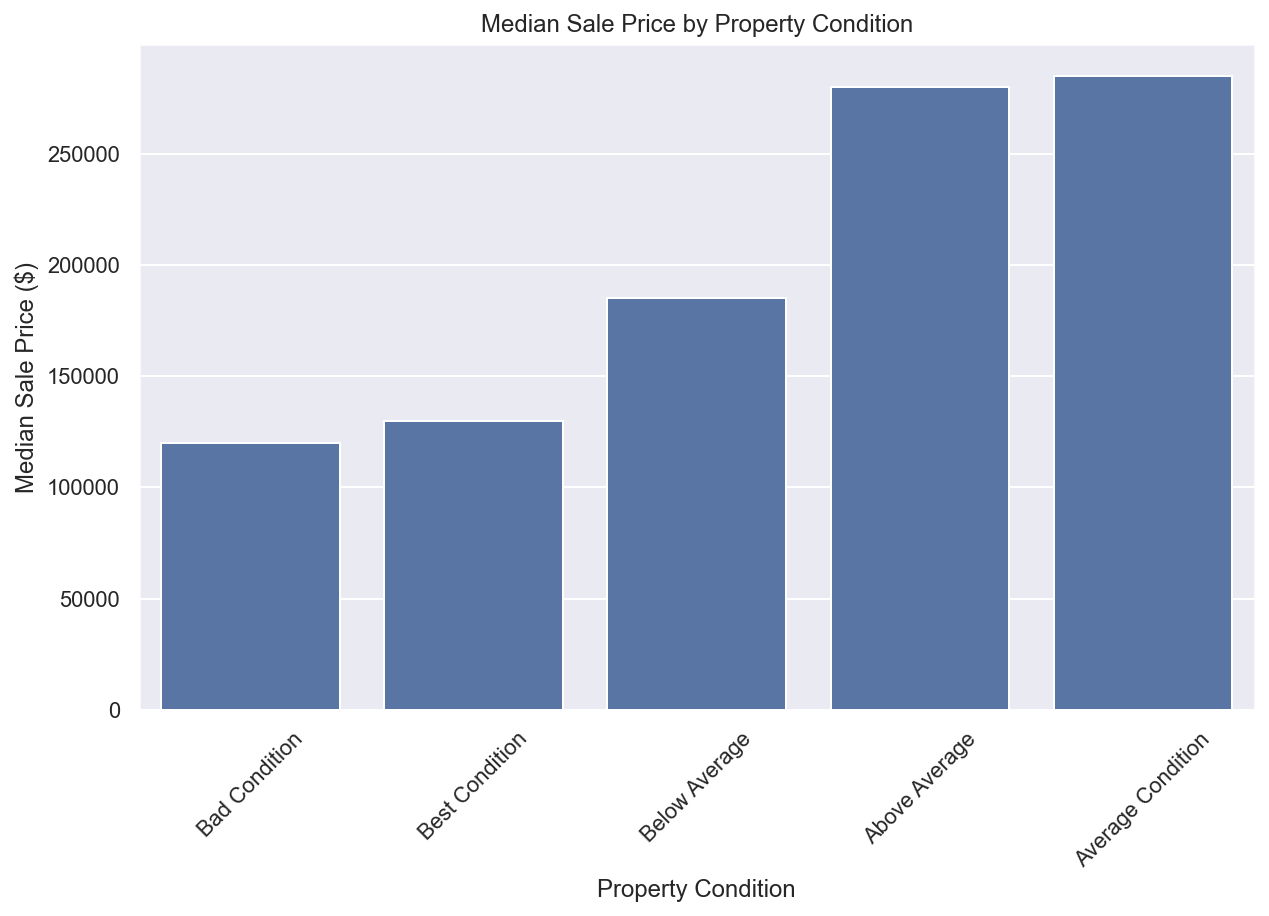

In [52]:
# Visualize median sale price by condition
median_sale_price = grouped_sale_price_stats['50%'].reset_index()
if 'None' in median_sale_price['overall_condition_bin'].values:
    median_sale_price = median_sale_price[median_sale_price['overall_condition_bin'] != 'None']
median_sale_price = median_sale_price.sort_values('50%')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=median_sale_price, x='overall_condition_bin', y='50%')
plt.title('Median Sale Price by Property Condition')
plt.xlabel('Property Condition')
plt.ylabel('Median Sale Price ($)')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [53]:
# 4. Create new derived features
property_sales_data['price_per_sqft'] = property_sales_data['Sale_price'] / property_sales_data['FinishedSqft']
property_sales_data['total_bathrooms'] = property_sales_data['Fbath'] + (0.5 * property_sales_data['Hbath'])
property_sales_data['room_ratio'] = property_sales_data['Bdrms'] / property_sales_data['Rooms']

In [54]:
property_sales_data['rooms_per_square_feet'] = property_sales_data['Rooms'] / property_sales_data['FinishedSqft']

In [55]:
# 5. Log transform skewed numerical features
skewed_features = [
    feature for feature in numerical_features 
    if feature != 'Sale_price' and abs(skew(property_sales_data[feature])) > 0.75
]

for feature in skewed_features:
    property_sales_data[f'{feature}_log'] = np.log1p(property_sales_data[feature])
    print(f"Log-transformed {feature} due to skewness of {skew(property_sales_data[feature]):.2f}")

Log-transformed Stories due to skewness of 5.25
Log-transformed Year_Built due to skewness of -16.39
Log-transformed FinishedSqft due to skewness of 1.02
Log-transformed Units due to skewness of 46.88
Log-transformed Hbath due to skewness of 1.75
Log-transformed Lotsize due to skewness of 129.87


In [56]:
# Create a summary of key findings and insights
eda_summary = {
    'Target Variable': {
        'Distribution': 'Right-skewed, log transformation recommended',
        'Range': f"${property_sales_data['Sale_price'].min():,.2f} to ${property_sales_data['Sale_price'].max():,.2f}",
        'Mean': f"${property_sales_data['Sale_price'].mean():,.2f}",
        'Median': f"${property_sales_data['Sale_price'].median():,.2f}"
    },
    'Top Correlations with Sale Price': {},
    'Key Insights': [
        'Property size (FinishedSqft) shows strong positive correlation with price',
        'Number of rooms and bathrooms are good predictors of price',
        'Property condition significantly affects sale price',
        'Location (District) is an important factor in determining price'
    ],
    'Feature Engineering Steps Taken': [
        'Created price per square foot feature',
        'Binned property conditions into meaningful categories',
        'Created bedroom count bins',
        'Created neighborhood/area bins',
        'Created total bathrooms feature (full + half)',
        'Log transformed skewed features'
    ],
    'Modeling Recommendations': [
        'Consider both original and log-transformed Sale_price as target',
        'Remove highly correlated features to avoid multicollinearity',
        'Encode categorical variables appropriately',
        'Use feature selection techniques to identify most important predictors'
    ]
}

# Add top correlations
correlation_with_price = property_sales_data[numerical_features].corr()['Sale_price'].sort_values(ascending=False)
for feature, corr in correlation_with_price.items():
    if feature != 'Sale_price' and abs(corr) > 0.3:  # Only include moderate to strong correlations
        eda_summary['Top Correlations with Sale Price'][feature] = f"{corr:.4f}"

# Print the summary
import json
print("\nEDA SUMMARY:")
print(json.dumps(eda_summary, indent=4))


EDA SUMMARY:
{
    "Target Variable": {
        "Distribution": "Right-skewed, log transformation recommended",
        "Range": "$2,500.00 to $424,750.00",
        "Mean": "$192,472.42",
        "Median": "$177,900.00"
    },
    "Top Correlations with Sale Price": {
        "FinishedSqft": "0.4287",
        "nbhd": "0.3847"
    },
    "Key Insights": [
        "Property size (FinishedSqft) shows strong positive correlation with price",
        "Number of rooms and bathrooms are good predictors of price",
        "Property condition significantly affects sale price",
        "Location (District) is an important factor in determining price"
    ],
    "Feature Engineering Steps Taken": [
        "Created price per square foot feature",
        "Binned property conditions into meaningful categories",
        "Created bedroom count bins",
        "Created neighborhood/area bins",
        "Created total bathrooms feature (full + half)",
        "Log transformed skewed features"
    ],
  

In [57]:
##### Data Preparation

In [58]:
# 1. Prepare features and target variable
# Choose your target (original or log-transformed)
target = 'log_Sale_price'  # or 'Sale_price'
y = property_sales_data[target]

In [59]:
# 2. Prepare feature set
# Remove original and log-transformed target variables
drop_cols = ['Sale_price', 'log_Sale_price'] if 'log_Sale_price' in property_sales_data.columns else ['Sale_price']

In [60]:
# Select features to use

In [61]:
# Use selected numerical and engineered features
numerical_to_use = [
    'FinishedSqft', 'Lotsize', 'Rooms', 'Bdrms', 'Fbath', 'Hbath', 'Stories', 'District',
    'price_per_sqft', 'total_bathrooms', 'room_ratio'
]

In [62]:
# Use all numerical and encoded categorical
# First, encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_encoded = {}
for col in categorical_features:
    if property_sales_data[col].nunique() < 10:  # Only encode categories with few values
        le = LabelEncoder()
        property_sales_data[f'{col}_encoded'] = le.fit_transform(property_sales_data[col])
        categorical_encoded[col] = f'{col}_encoded'

In [63]:
# Combine numerical and encoded categorical features
categorical_to_use = list(categorical_encoded.values())
all_features_to_use = numerical_to_use + categorical_to_use

In [64]:
# Filter out features with too many missing values or constant values
X = property_sales_data[all_features_to_use].copy()

In [65]:
# 3. Remove highly correlated features to avoid multicollinearity
def correlation_removal(dataset, threshold=0.8):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

correlated_features = correlation_removal(X, 0.8)
print(f"\nCorrelated features to be removed: {correlated_features}")
X = X.drop(columns=correlated_features, errors='ignore')


Correlated features to be removed: {'Bdrms', 'total_bathrooms'}


In [66]:
print(np.isinf(X).sum())

FinishedSqft         0
Lotsize              0
Rooms                0
Fbath                0
Hbath                0
Stories              0
District             0
price_per_sqft      11
room_ratio           0
PropType_encoded     0
dtype: int64


In [67]:
print(X.isna().sum())

FinishedSqft        0
Lotsize             0
Rooms               0
Fbath               0
Hbath               0
Stories             0
District            0
price_per_sqft      0
room_ratio          0
PropType_encoded    0
dtype: int64


In [68]:
X = X.replace([np.inf, -np.inf], np.nan)

In [69]:
X["price_per_sqft"].fillna(X["price_per_sqft"].median(), inplace=True)

In [70]:
print(X.isna().sum())

FinishedSqft        0
Lotsize             0
Rooms               0
Fbath               0
Hbath               0
Stories             0
District            0
price_per_sqft      0
room_ratio          0
PropType_encoded    0
dtype: int64


In [71]:
# 4. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (16006, 10)
Testing set shape: (4002, 10)


In [72]:
# 5. Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
###### Model Selection

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [75]:
# 2. Create a dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

In [76]:
# 3. Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return rmse, mae, r2

In [77]:
# 4. Train and evaluate all models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    rmse, mae, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, MAE = {mae:.4f}, R2 = {r2:.4f}")

Training Linear Regression...
Linear Regression: RMSE = 0.5772, MAE = 0.4215, R2 = 0.3002
Training Ridge...
Ridge: RMSE = 0.5772, MAE = 0.4215, R2 = 0.3001
Training Lasso...
Lasso: RMSE = 0.6900, MAE = 0.4842, R2 = -0.0001
Training ElasticNet...
ElasticNet: RMSE = 0.6900, MAE = 0.4842, R2 = -0.0001
Training Random Forest...
Random Forest: RMSE = 0.1216, MAE = 0.0248, R2 = 0.9689
Training Gradient Boosting...
Gradient Boosting: RMSE = 0.1333, MAE = 0.0524, R2 = 0.9627


In [78]:
# 5. Compare model performance
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel comparison:")
display(results_df.sort_values('RMSE'))


Model comparison:


,RMSE,MAE,R2
Random Forest,0.121604,0.024792,0.968937
Gradient Boosting,0.133262,0.052439,0.962696
Linear Regression,0.577201,0.421458,0.300153
Ridge,0.577203,0.421459,0.300147
ElasticNet,0.689985,0.484155,-0.000066
Lasso,0.689985,0.484155,-0.000066


In [79]:
# 6. Select the best model based on RMSE
best_model_name = results_df.sort_values('RMSE').index[0]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [80]:
##### HyperParameter Tuning

In [81]:
# 1. Perform hyperparameter tuning for the best model
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

best_model = models[best_model_name]

In [82]:
# 2. Define parameter grid based on model type
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }
elif best_model_name == 'Linear Regression':
    # Linear regression doesn't have hyperparameters to tune
    param_grid = {}
elif best_model_name in ['Ridge', 'Lasso', 'ElasticNet']:
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    }
    
    if best_model_name == 'ElasticNet':
        param_grid['l1_ratio'] = [0.1, 0.3, 0.5, 0.7, 0.9]

In [83]:
# 3. Perform grid search if there are parameters to tune
if param_grid:
    print(f"\nPerforming hyperparameter tuning for {best_model_name}...")
    grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)

    # randomized_search = RandomizedSearchCV(
    #     best_model, param_grid, cv=3, scoring='neg_mean_squared_error', 
    #     n_jobs=-1, n_iter=10, random_state=42, verbose=2
    # )
    # randomized_search.fit(X_train_scaled, y_train)
    
    # Get best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters: {best_params}")
    
    # Train final model with best parameters
    final_model = grid_search.best_estimator_
else:
    print(f"\nNo hyperparameters to tune for {best_model_name}.")
    final_model = best_model
    final_model.fit(X_train_scaled, y_train)


Performing hyperparameter tuning for Random Forest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


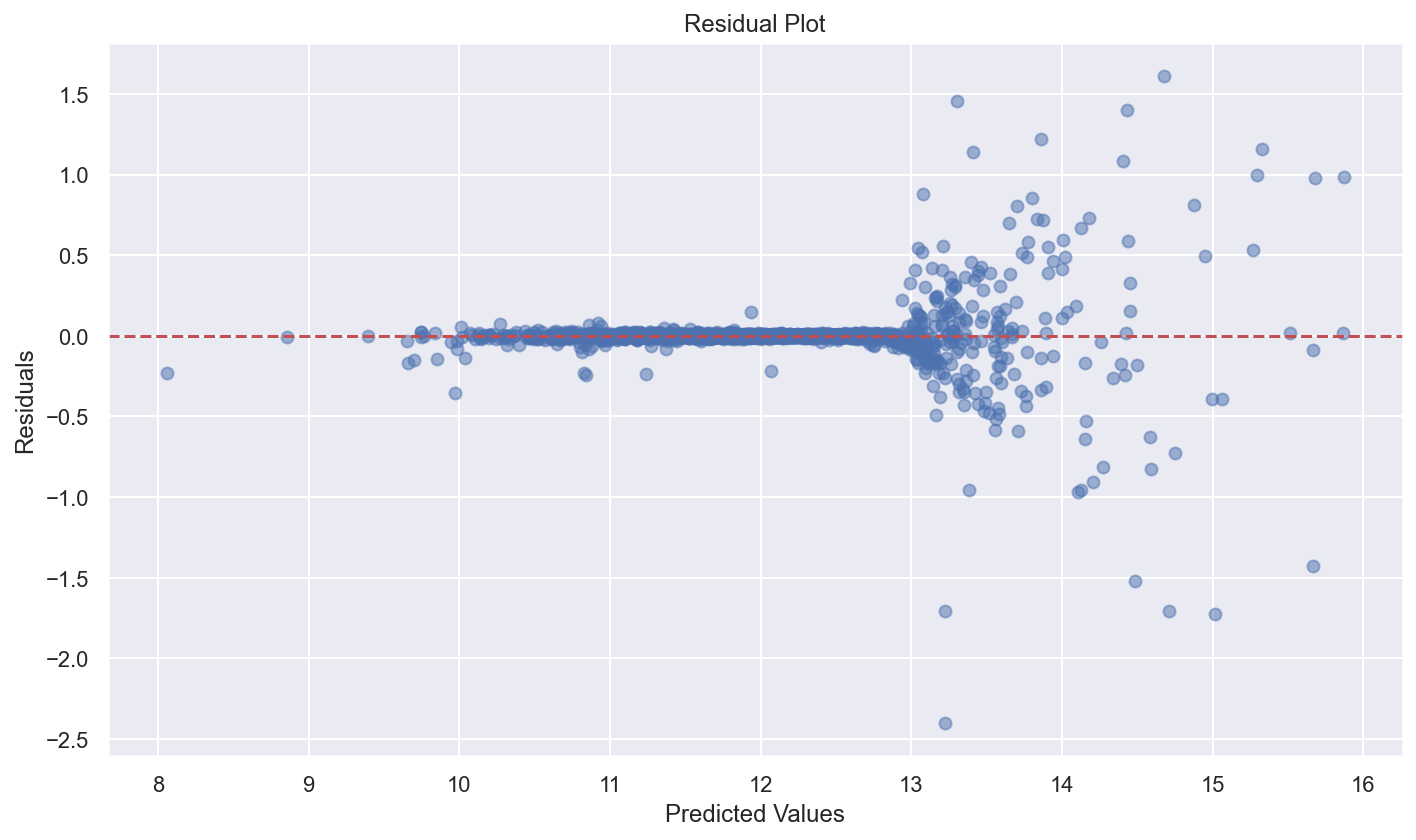

In [84]:
# 2. Plot residuals
# First we need to get the predictions on the test set
y_pred = final_model.predict(X_test_scaled)

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

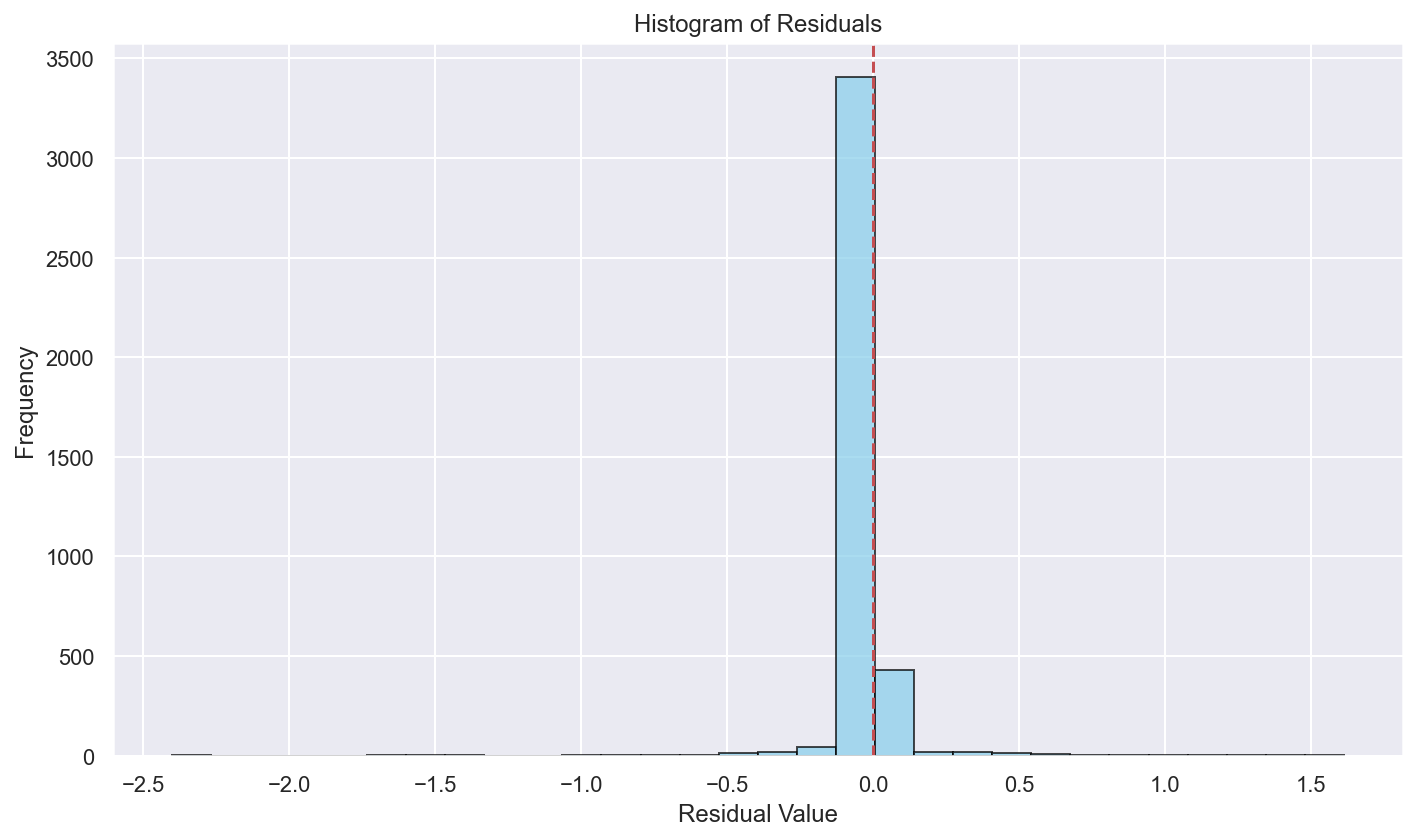

In [85]:
# 3. Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()

In [86]:
# 4. Calculate and display error metrics by property type or price range
# If using log-transformed target, convert back to original scale
if target == 'log_Sale_price':
    y_test_orig = np.expm1(y_test)
    y_pred_orig = np.expm1(y_pred)
else:
    y_test_orig = y_test
    y_pred_orig = y_pred

In [87]:
# Create price ranges for analysis
y_test_orig_df = pd.DataFrame({'actual': y_test_orig, 'predicted': y_pred_orig})
y_test_orig_df['price_range'] = pd.qcut(y_test_orig_df['actual'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [88]:
# Calculate RMSE and MAPE by price range
price_range_metrics = {}
for price_range in y_test_orig_df['price_range'].unique():
    subset = y_test_orig_df[y_test_orig_df['price_range'] == price_range]
    rmse = np.sqrt(mean_squared_error(subset['actual'], subset['predicted']))
    mape = np.mean(np.abs((subset['actual'] - subset['predicted']) / subset['actual'])) * 100
    price_range_metrics[price_range] = {'RMSE': rmse, 'MAPE': mape}

price_range_df = pd.DataFrame.from_dict(price_range_metrics, orient='index')
print("\nModel performance by price range:")
display(price_range_df)


Model performance by price range:


,RMSE,MAPE
High,826796.046720,8.755743
Medium-Low,1508.292755,0.371393
Low,21360.290843,2.444661
Medium-High,830.771848,0.272340


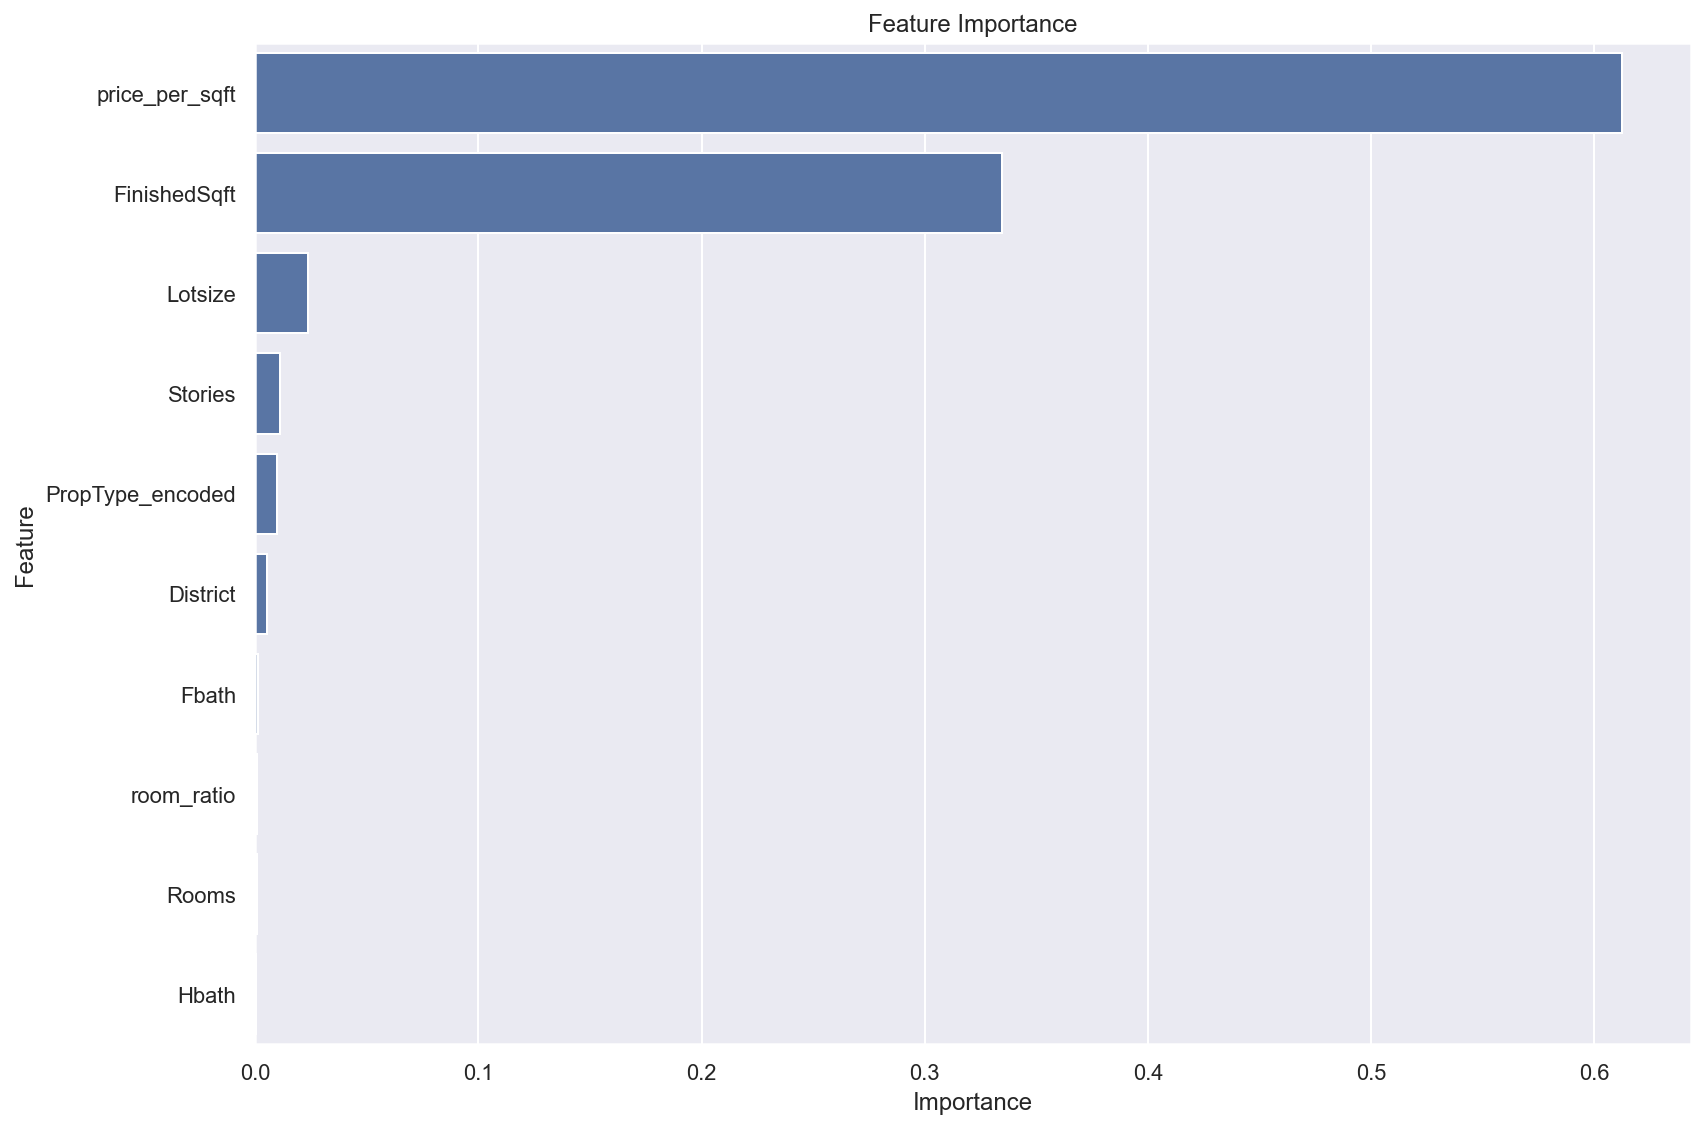


Top 15 most important features:


,Feature,Importance
7,price_per_sqft,0.612481
0,FinishedSqft,0.334795
1,Lotsize,0.023545
5,Stories,0.011192
9,PropType_encoded,0.009762
6,District,0.005289
3,Fbath,0.001146
8,room_ratio,0.000675
2,Rooms,0.000610
4,Hbath,0.000506


In [89]:
# 5. Feature importance (if applicable)
if hasattr(final_model, 'feature_importances_'):
    # For tree-based models
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 15 most important features:")
    display(feature_importance.head(15))
    
elif hasattr(final_model, 'coef_'):
    # For linear models
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': final_model.coef_
    }).sort_values('Coefficient', ascending=False)
    
    # Plot coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(15))
    plt.title('Feature Coefficients')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 15 features by coefficient magnitude:")
    display(coefficients.head(15))

In [90]:
# 6. Cross-validation performance
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print("\nCross-validation RMSE scores:")
for i, score in enumerate(cv_rmse):
    print(f"Fold {i+1}: {score:.4f}")
print(f"Mean RMSE: {cv_rmse.mean():.4f}")
print(f"Standard Deviation: {cv_rmse.std():.4f}")


Cross-validation RMSE scores:
Fold 1: 0.1177
Fold 2: 0.1030
Fold 3: 0.1229
Fold 4: 0.1210
Fold 5: 0.1394
Mean RMSE: 0.1208
Standard Deviation: 0.0116


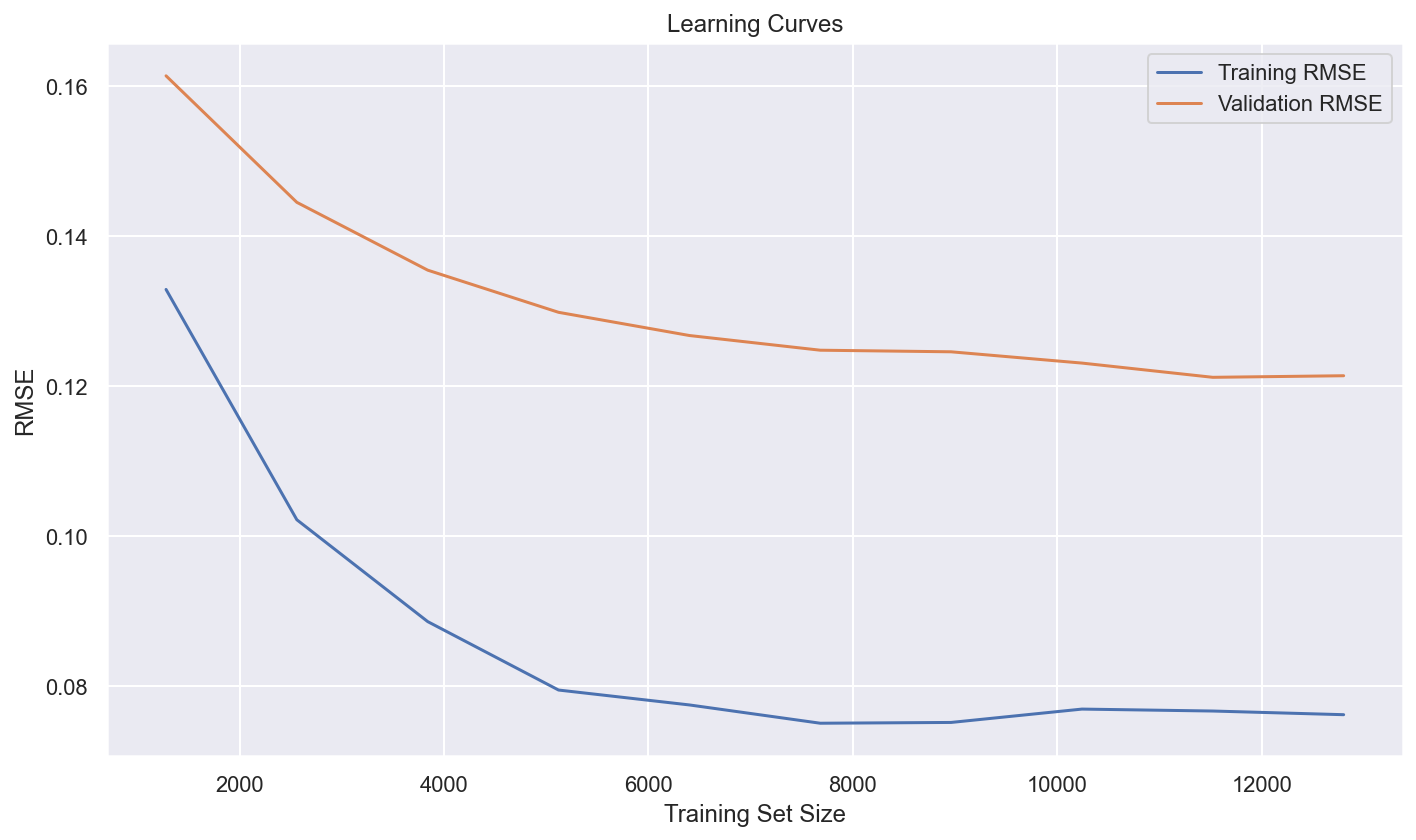

In [91]:
# 7. Learning curves (optional)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_model, X_train_scaled, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='neg_mean_squared_error'
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE')
plt.plot(train_sizes, test_rmse, label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
# Enhanced Ensemble Model Creation with Optimized Weights and Feature Selection
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.model_selection import GridSearchCV

print("\n## Enhanced Ensemble Model Creation ##")
print("Creating optimized ensemble with feature selection...")


## Enhanced Ensemble Model Creation ##
Creating optimized ensemble with feature selection...


In [93]:
# # 1. Feature Selection using Random Forest importance
# print("Performing feature selection...")
# rf_selector = SelectFromModel(
#     RandomForestRegressor(n_estimators=100, random_state=42),
#     threshold="median"  # Select features with importance > median
# )
# rf_selector.fit(X_train_scaled, y_train)
# selected_features_mask = rf_selector.get_support()
# selected_features = X.columns[selected_features_mask]

# print(f"Selected {len(selected_features)}/{len(X.columns)} features:")
# print(", ".join(selected_features))

In [94]:
# # Apply feature selection
# X_train_selected = rf_selector.transform(X_train_scaled)
# X_test_selected = rf_selector.transform(X_test_scaled)

In [95]:
# 2. Get the best versions of Random Forest and Gradient Boosting
if 'grid_search' in locals() and best_model_name == 'Random Forest':
    best_rf = grid_search.best_estimator_
else:
    best_rf = RandomForestRegressor(
        n_estimators=200, 
        max_depth=20,
        min_samples_split=5,
        random_state=42
    )
    best_rf.fit(X_train_scaled, y_train)

In [96]:
# Create and fit a Gradient Boosting model
if best_model_name != 'Gradient Boosting':
    gbr = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    gbr.fit(X_train_scaled, y_train)
else:
    gbr = final_model

In [97]:
# 3. Optimize voting weights using cross-validation
print("Optimizing ensemble voting weights...")
# Define potential weight combinations to try
weight_options = [
    [0.7, 0.3],
    [0.6, 0.4],
    [0.5, 0.5],
    [0.4, 0.6],
    [0.3, 0.7]
]

Optimizing ensemble voting weights...


In [99]:
# Test each weight combination
weight_results = {}
for weights in weight_options:
    # Create voting ensemble with these weights
    voting_model = VotingRegressor(
        estimators=[
            ('random_forest', best_rf),
            ('gradient_boosting', gbr)
        ],
        weights=weights
    )
    
    # Use cross-validation to evaluate
    cv_scores = cross_val_score(
        voting_model, 
        X_train_scaled, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error'
    )
    
    # Store mean score (higher is better since it's negative RMSE)
    weight_results[str(weights)] = -cv_scores.mean()
    print(f"Weights {weights}: RMSE = {-cv_scores.mean():.4f}")

Weights [0.7, 0.3]: RMSE = 0.1198
Weights [0.6, 0.4]: RMSE = 0.1202
Weights [0.5, 0.5]: RMSE = 0.1209
Weights [0.4, 0.6]: RMSE = 0.1219
Weights [0.3, 0.7]: RMSE = 0.1233


In [100]:
# Get the best weights
best_weights_str = min(weight_results, key=weight_results.get)
best_weights = eval(best_weights_str)
print(f"Best weights found: {best_weights}")

Best weights found: [0.7, 0.3]


In [101]:
# 4. Create optimized voting ensemble with best weights
optimized_voting_ensemble = VotingRegressor(
    estimators=[
        ('random_forest', best_rf),
        ('gradient_boosting', gbr)
    ],
    weights=best_weights
)

In [102]:
# Fit the optimized voting ensemble
optimized_voting_ensemble.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('random_forest',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   n_estimators=300,
                                                   random_state=42)),
                            ('gradient_boosting',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=200,
                                                       random_state=42))],
                weights=[0.7, 0.3])

In [103]:
# 5. Create a stacking ensemble with feature selection
stacking_ensemble = StackingRegressor(
    estimators=[
        ('random_forest', best_rf),
        ('gradient_boosting', gbr)
    ],
    final_estimator=Ridge(alpha=1.0),
    cv=5
)

In [104]:
# Fit the stacking ensemble
stacking_ensemble.fit(X_train_scaled, y_train)

StackingRegressor(cv=5,
                  estimators=[('random_forest',
                               RandomForestRegressor(max_depth=20,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     random_state=42)),
                              ('gradient_boosting',
                               GradientBoostingRegressor(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42))],
                  final_estimator=Ridge())

In [105]:
# 6. Evaluate all ensemble models
ensemble_models = {
    'Random Forest': best_rf,
    'Gradient Boosting': gbr,
    'Optimized Voting Ensemble': optimized_voting_ensemble,
    'Stacking Ensemble': stacking_ensemble
}

In [106]:
# Compare performance
ensemble_results = {}
for name, model in ensemble_models.items():
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    ensemble_results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, MAE = {mae:.4f}, R2 = {r2:.4f}")

Random Forest: RMSE = 0.1229, MAE = 0.0252, R2 = 0.9683
Gradient Boosting: RMSE = 0.1188, MAE = 0.0376, R2 = 0.9704
Optimized Voting Ensemble: RMSE = 0.1191, MAE = 0.0274, R2 = 0.9702
Stacking Ensemble: RMSE = 0.1194, MAE = 0.0269, R2 = 0.9700


In [107]:
# 7. Create DataFrame for comparison
ensemble_results_df = pd.DataFrame.from_dict(ensemble_results, orient='index')
print("\nEnhanced Ensemble Models Comparison:")
display(ensemble_results_df.sort_values('RMSE'))


Enhanced Ensemble Models Comparison:


,RMSE,MAE,R2
Gradient Boosting,0.118783,0.037644,0.970361
Optimized Voting Ensemble,0.119090,0.027366,0.970208
Stacking Ensemble,0.119414,0.026943,0.970046
Random Forest,0.122925,0.025206,0.968258


In [108]:
# Select the best ensemble model
best_ensemble_model_name = ensemble_results_df.sort_values('RMSE').index[0]
print(f"\nBest Ensemble Model: {best_ensemble_model_name}")


Best Ensemble Model: Gradient Boosting


In [109]:
# Use the best ensemble model as your final model
final_model = ensemble_models[best_ensemble_model_name]
print(f"Final model updated to: {best_ensemble_model_name}")

Final model updated to: Gradient Boosting


In [111]:
# Store feature selector for prediction pipeline
feature_selector = X

In [113]:
# Update predictions on test set with the best ensemble model
y_pred = final_model.predict(X_test_scaled)

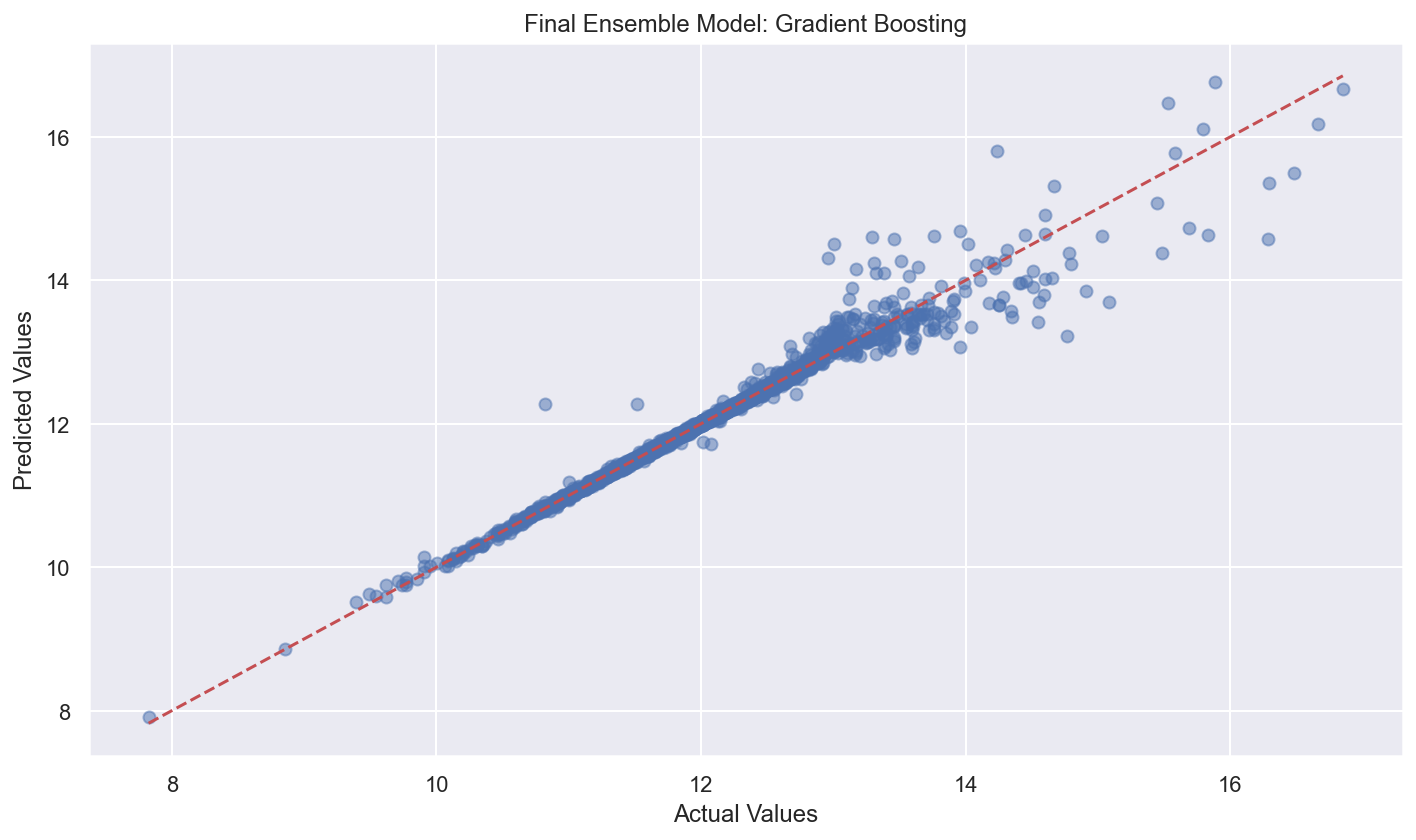

In [114]:
# 8. Visualize final model predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Final Ensemble Model: {best_ensemble_model_name}')
plt.tight_layout()
plt.show()